# Glass Identification Project

### Dataset Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. 
The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass

### Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Support Vector Classifier
from sklearn.svm import SVC

# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

# Saving and loading models
import joblib

### Elaboratory Data Analysis

In [2]:
# Load data from CSV into DataFrame
df = pd.read_csv('Glass_Identification_Dataset.csv', header = None)

In [3]:
# Display first 5 rows of the dataframe
df.head()

0        1      2     3     4      5     6     7    8    9   10
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1

No columns names are present in the dataset we need to specify the column name to each column.

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)


In [4]:
# Columns names for the columns in the dataset
columns_name = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [5]:
df.columns = columns_name

In [6]:
df.head()

Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [7]:
# Display shape of the dataframe
df.shape

(214, 11)

In [8]:
# Checking for the null values 
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No null values present in the dataset.

In [9]:
# Checking for the unique values in each column
df.nunique()

Id      214
RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [10]:
# Checking for the value count in the target vriable
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [11]:
# Display dataframe's details, such as column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [12]:
# Display summary statistics of the dataframe
df.describe()

Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.122500    8.240000    0.000000    0.000000    1.000000  
50%      0.555000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.172500    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

### Data Visualization

In [13]:
sns.set(style = 'whitegrid')

#### Univarate Analysis

#### Count Plot

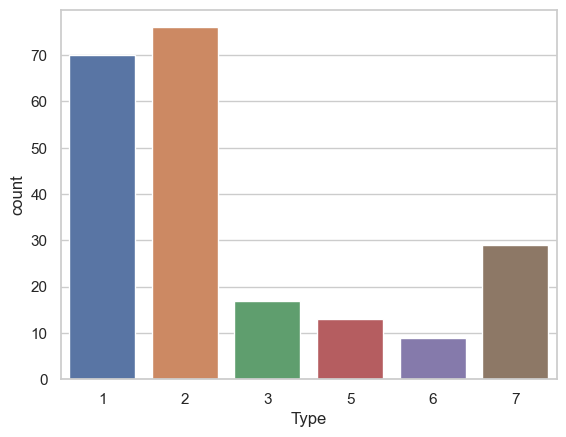

In [14]:
# Univariate analysis using count plot for categorical variable 'Type'
sns.countplot(x = 'Type', data = df)
plt.show()

#### Pie Chart

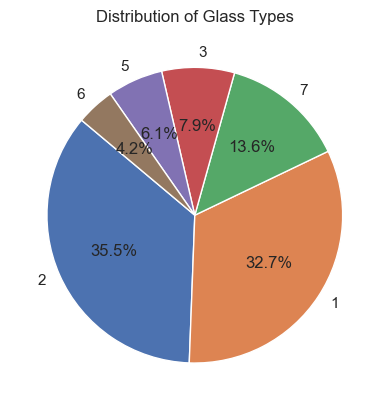

In [15]:
# Univariate analysis using pie chart for categorical variable 'Type'
type_counts = df['Type'].value_counts()
plt.pie(type_counts, labels = type_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.title("Distribution of Glass Types")
plt.show()

#### Histogram

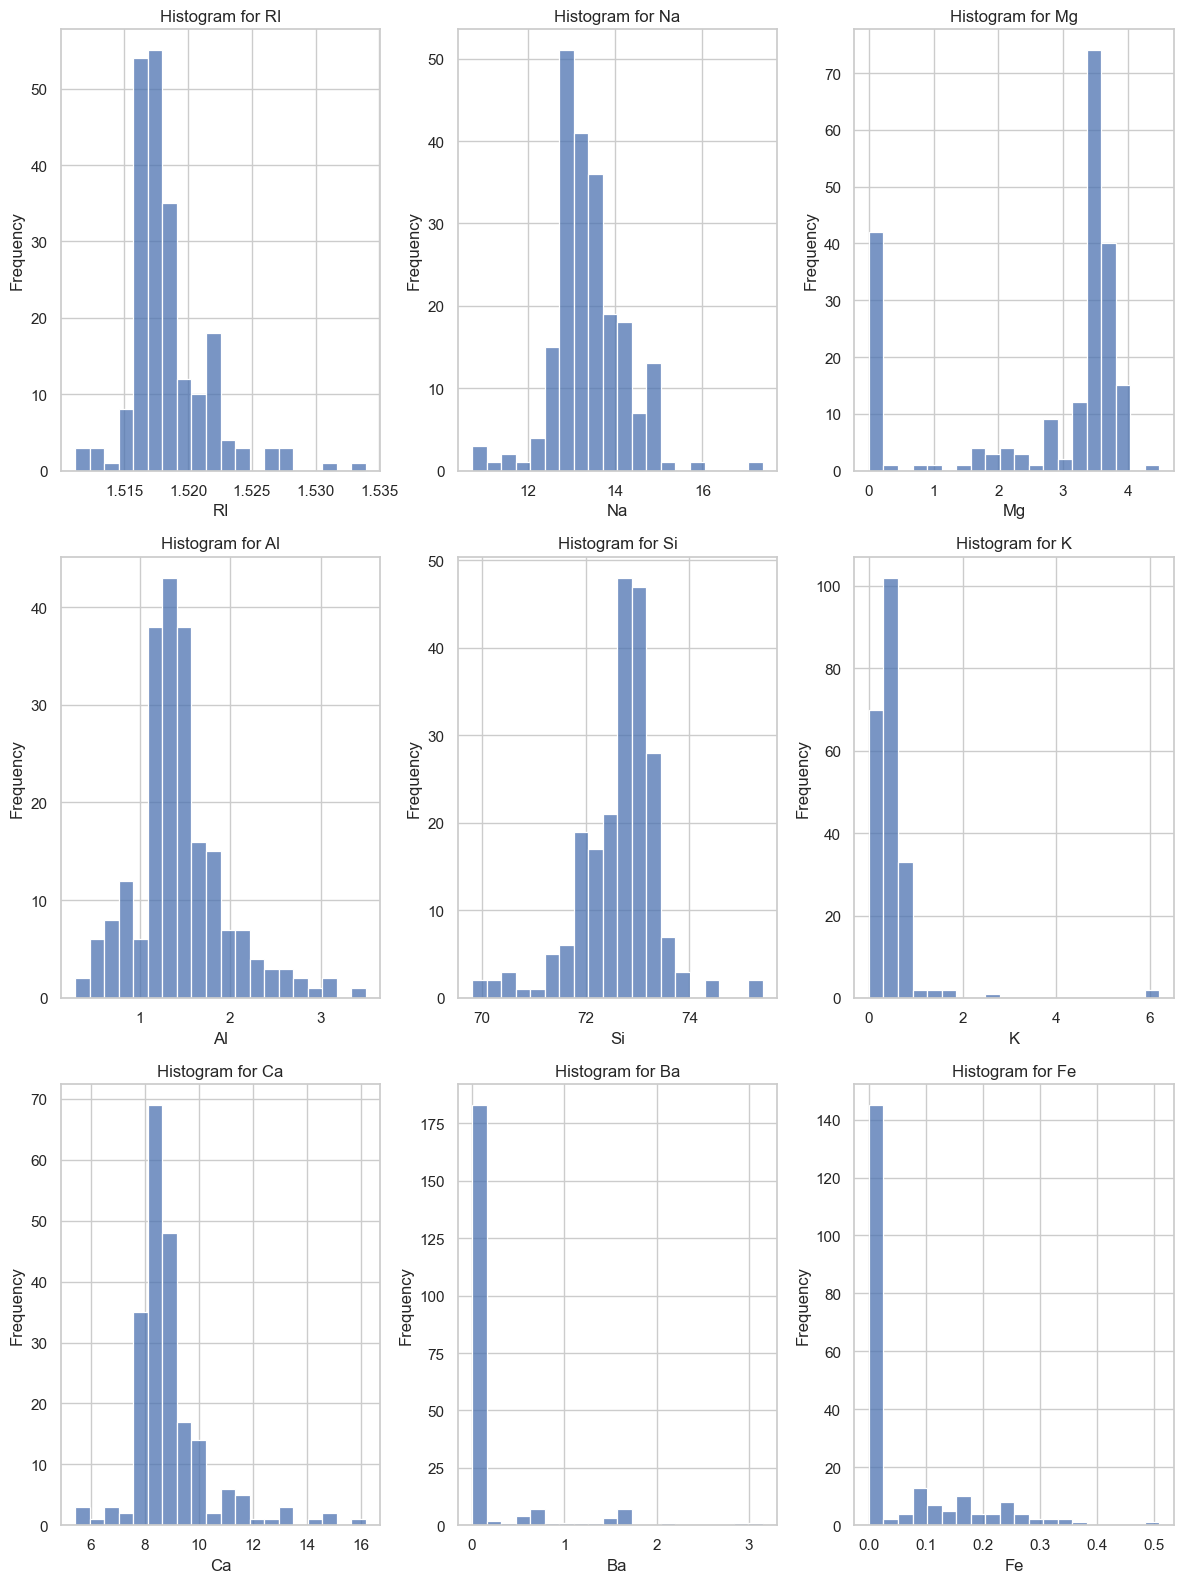

In [16]:
# Univariate analysis using histogram for numeric features
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12,16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.histplot(df[numerical_columns[i]], bins = 20, ax = ax)
    ax.set_title(f"Histogram for {numerical_columns[i]}")
    ax.set_xlabel(numerical_columns[i])
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Violin Plot

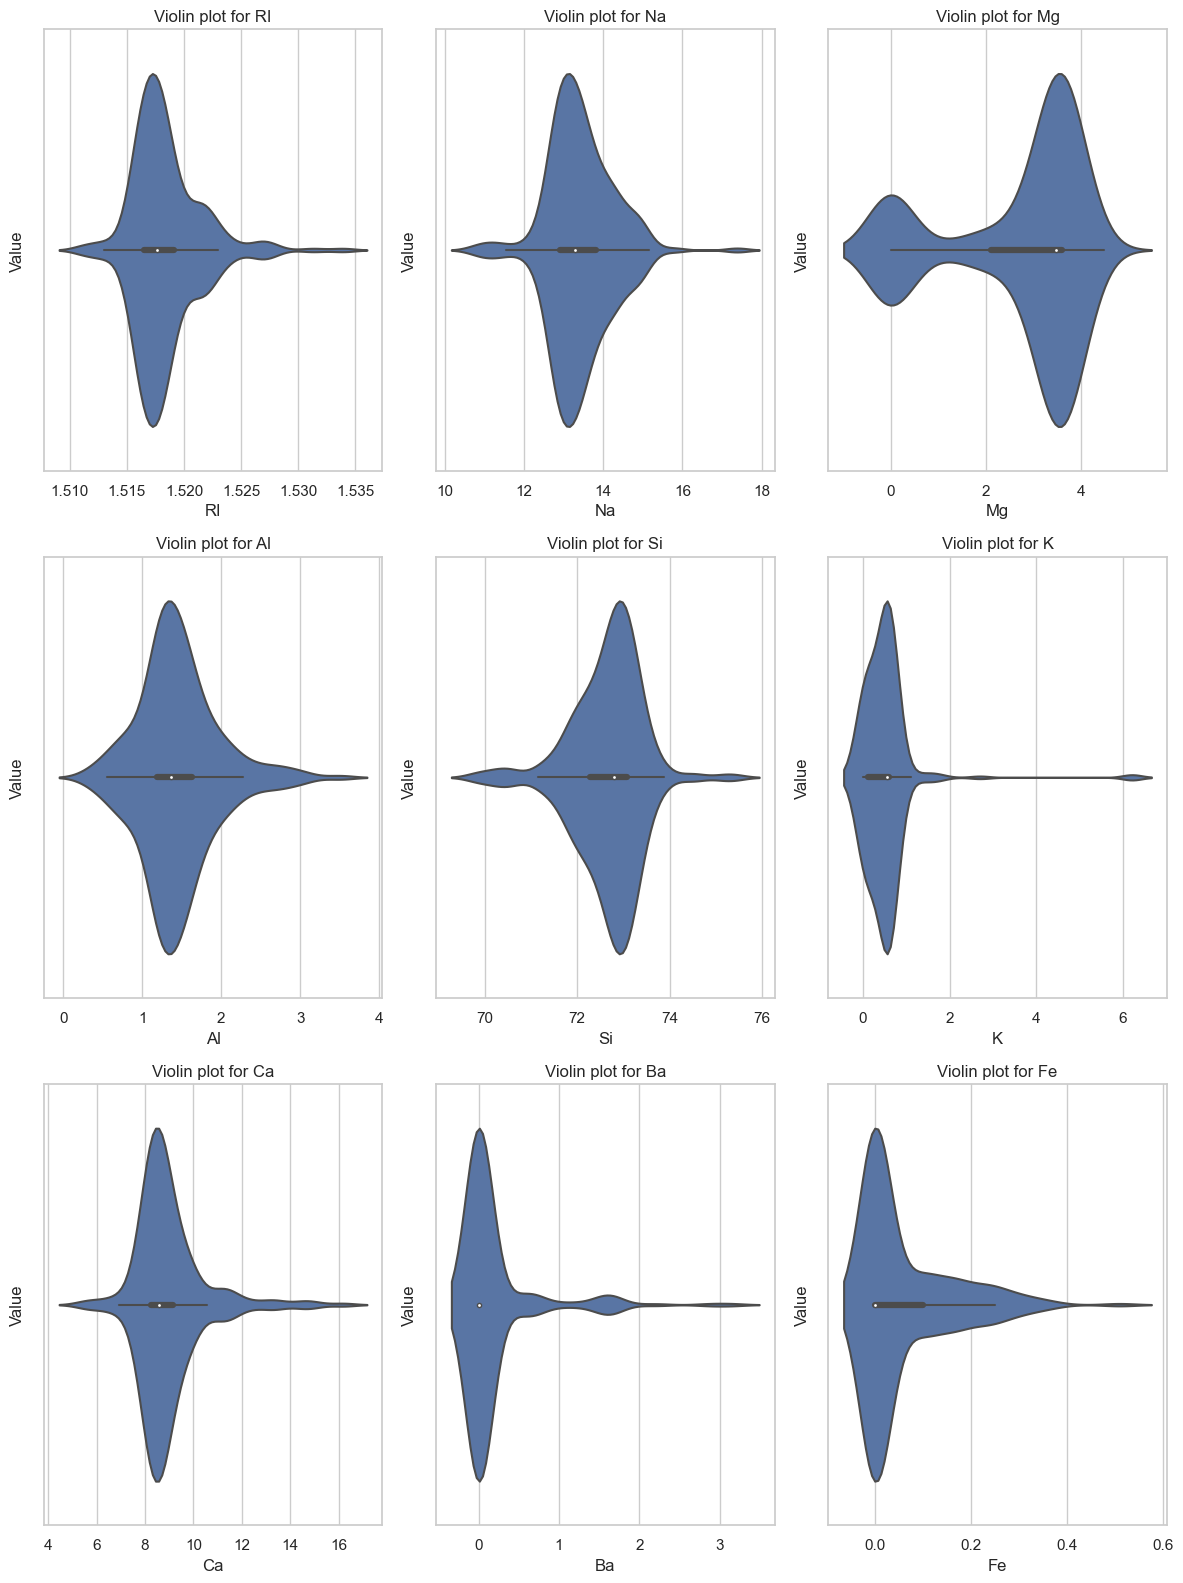

In [17]:
# Univariate analysis using violin plot for numeric features
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.violinplot(df[numerical_columns[i]], ax = ax)
    ax.set_title(f"Violin plot for {numerical_columns[i]}")
    ax.set_xlabel(numerical_columns[i])
    ax.set_ylabel("Value")
plt.tight_layout()
plt.show()

#### Bivariate Analysis

#### Pair plot

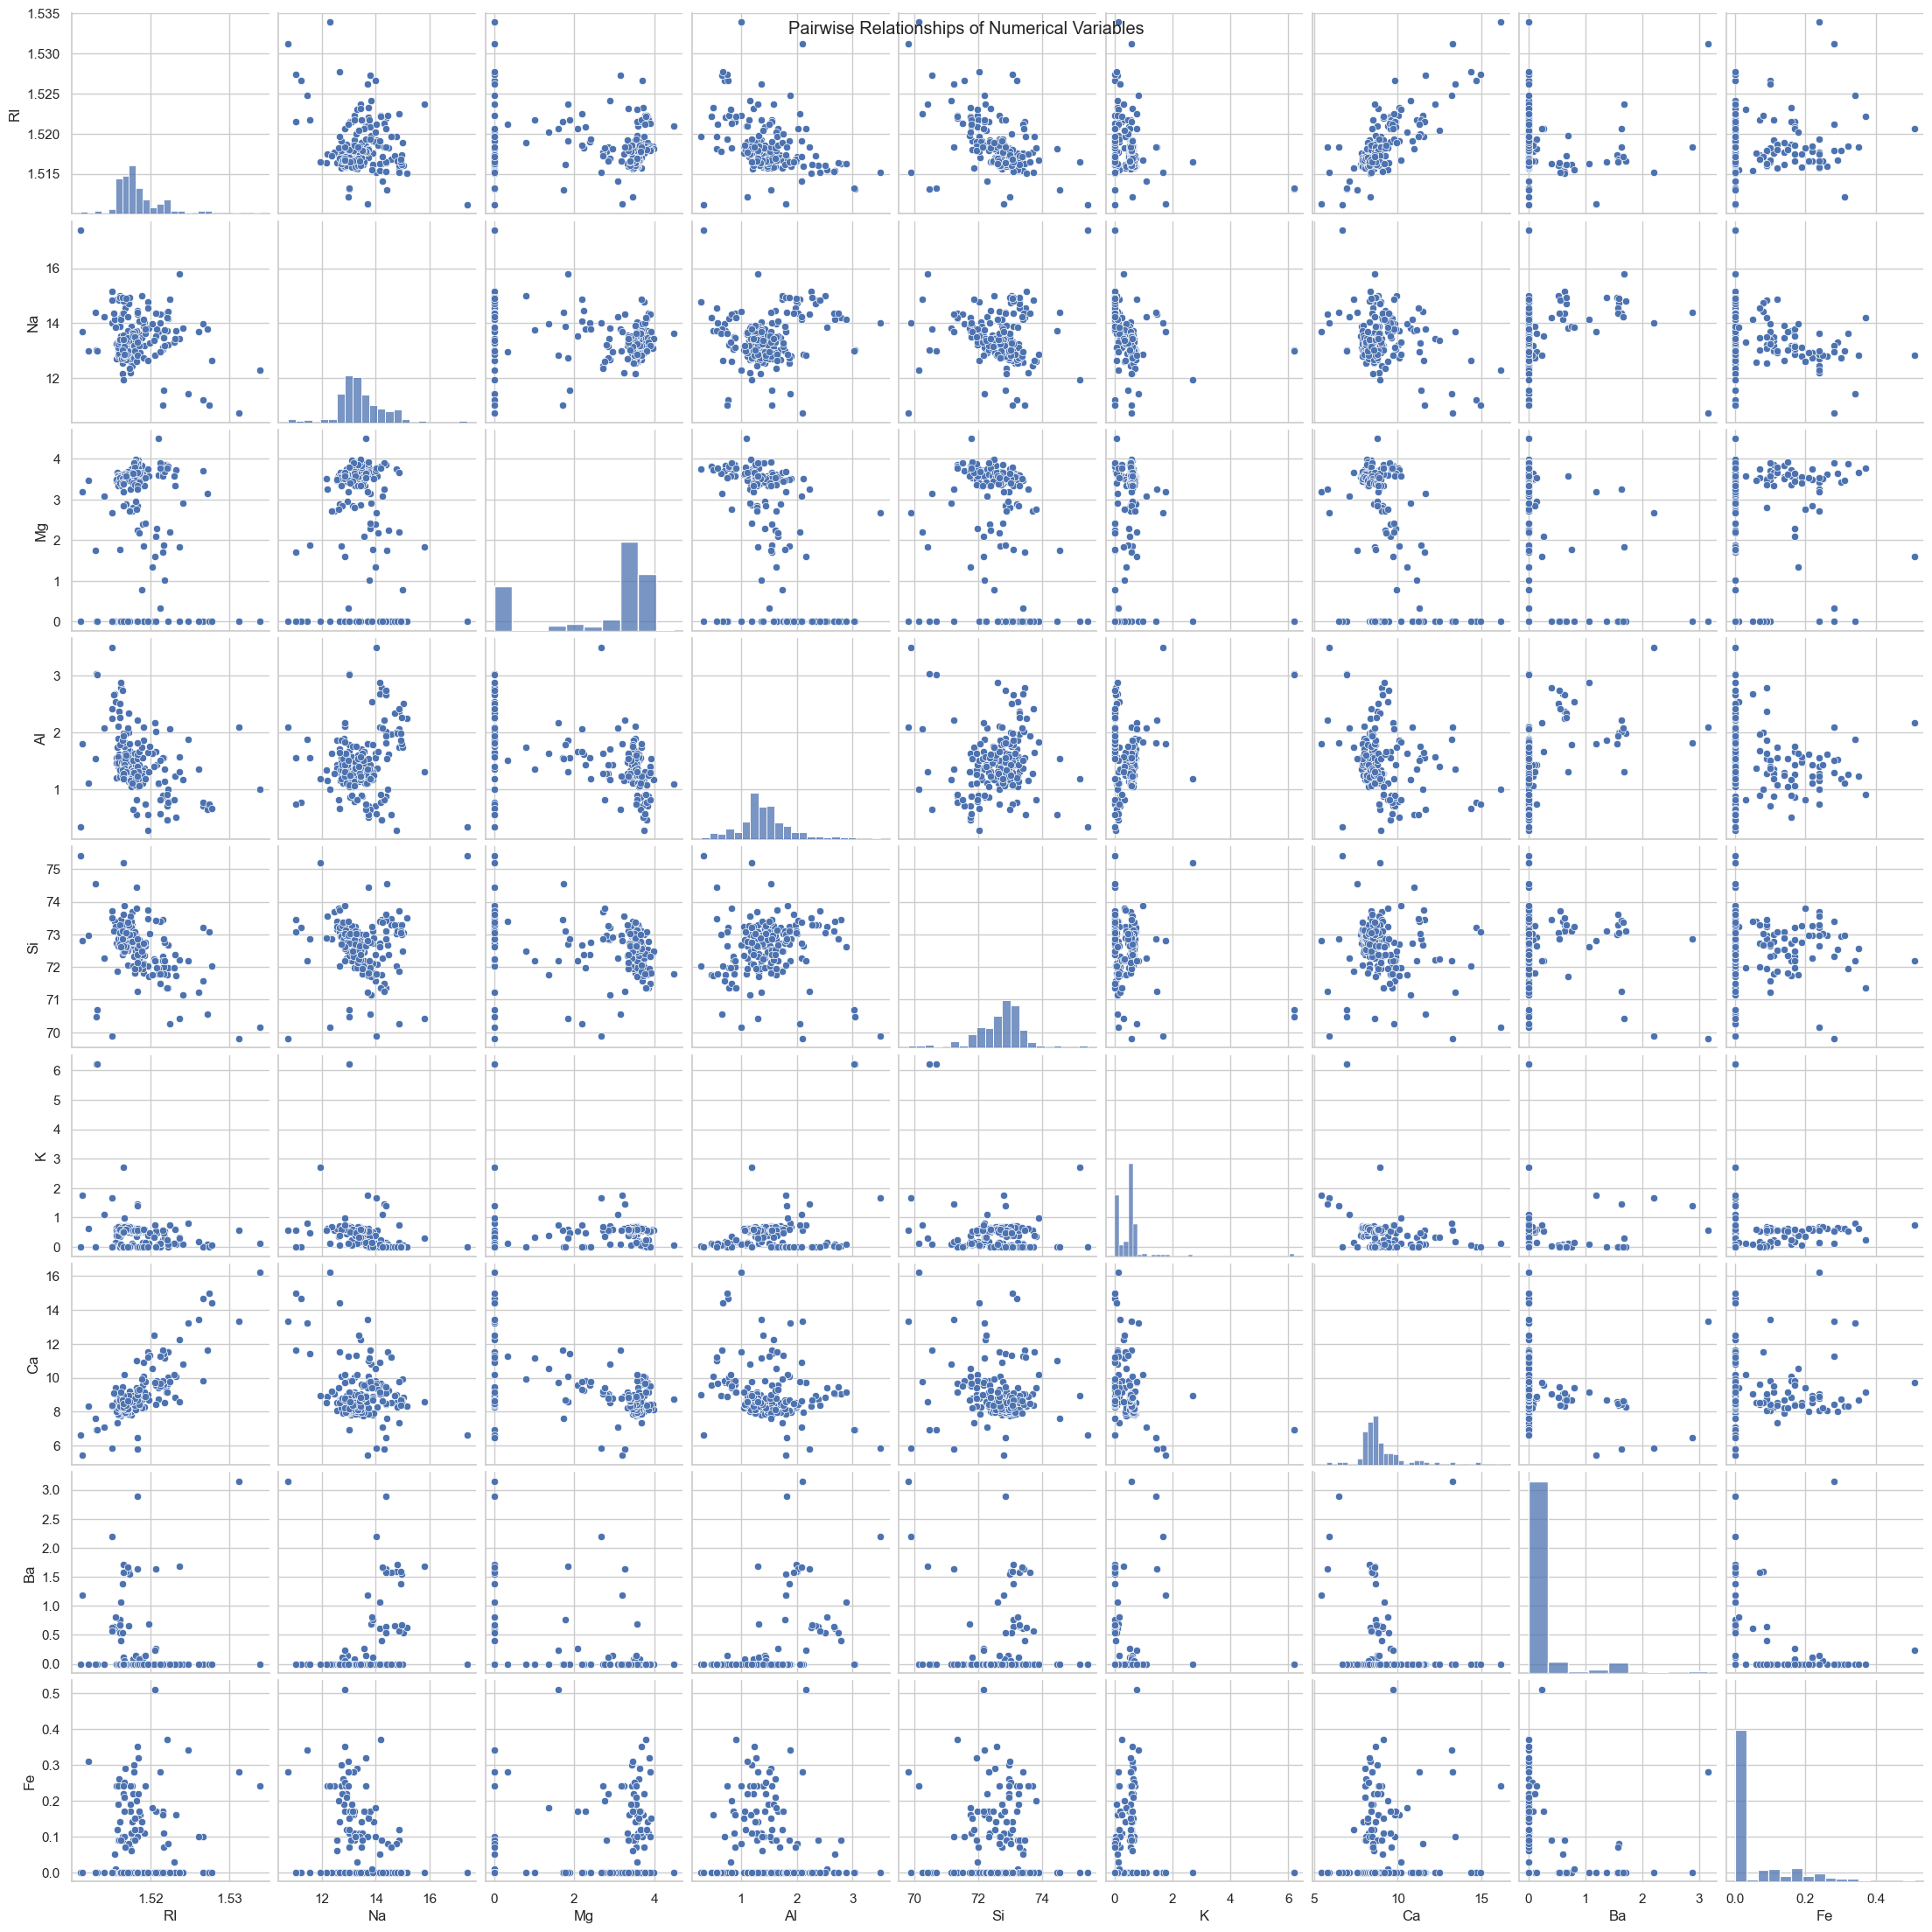

In [18]:
# Pairplot for bivariate analysis of numeric features
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
sns.pairplot(df[numerical_columns])
plt.suptitle("Pairwise Relationships of Numerical Variables")
plt.show()

#### Box plot

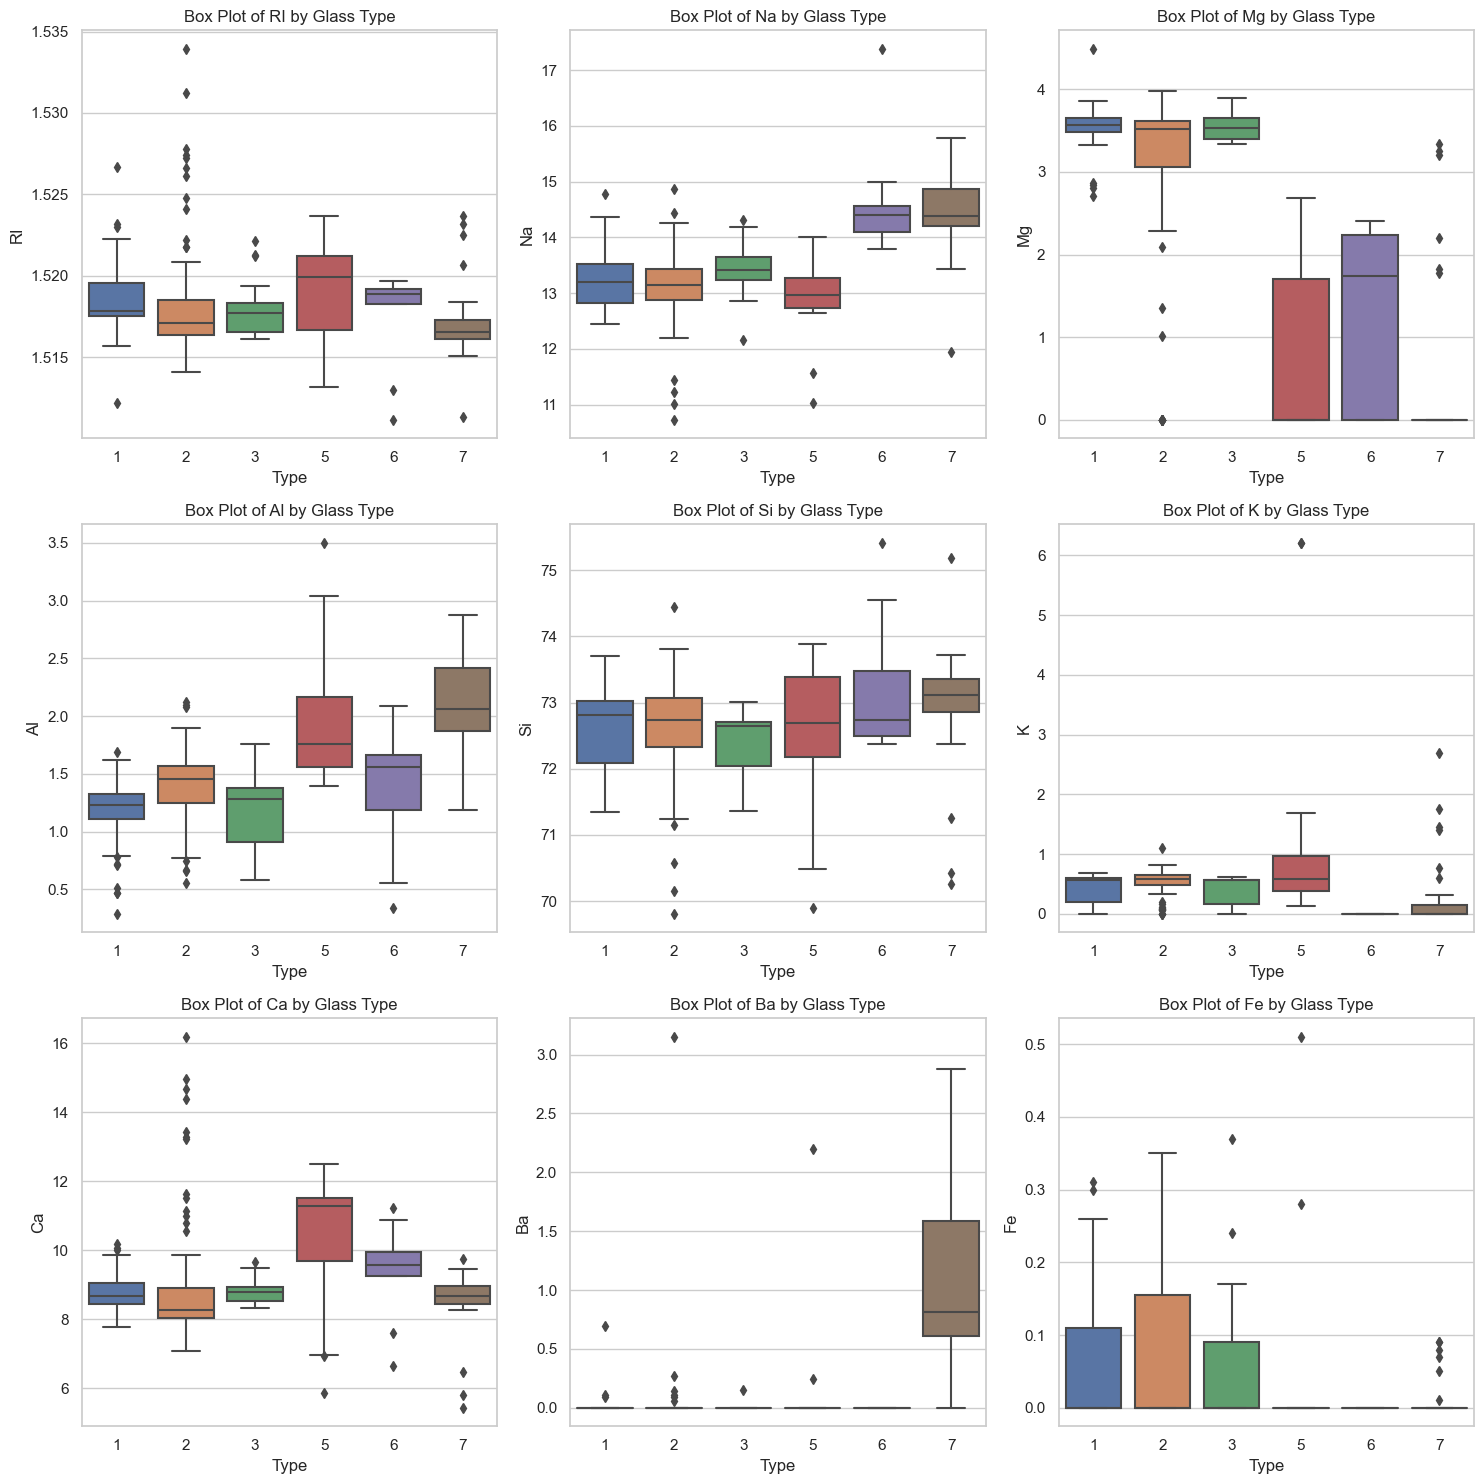

In [19]:
# Box plot to compare 'Type' with numeric features
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 15))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.boxplot(data = df, x = 'Type', y = numerical_columns[i], ax = ax)
    ax.set_title(f"Box Plot of {numerical_columns[i]} by Glass Type")
    ax.set_xlabel("Type")
    ax.set_ylabel(numerical_columns[i])
plt.tight_layout()
plt.show()

#### Violin Plot

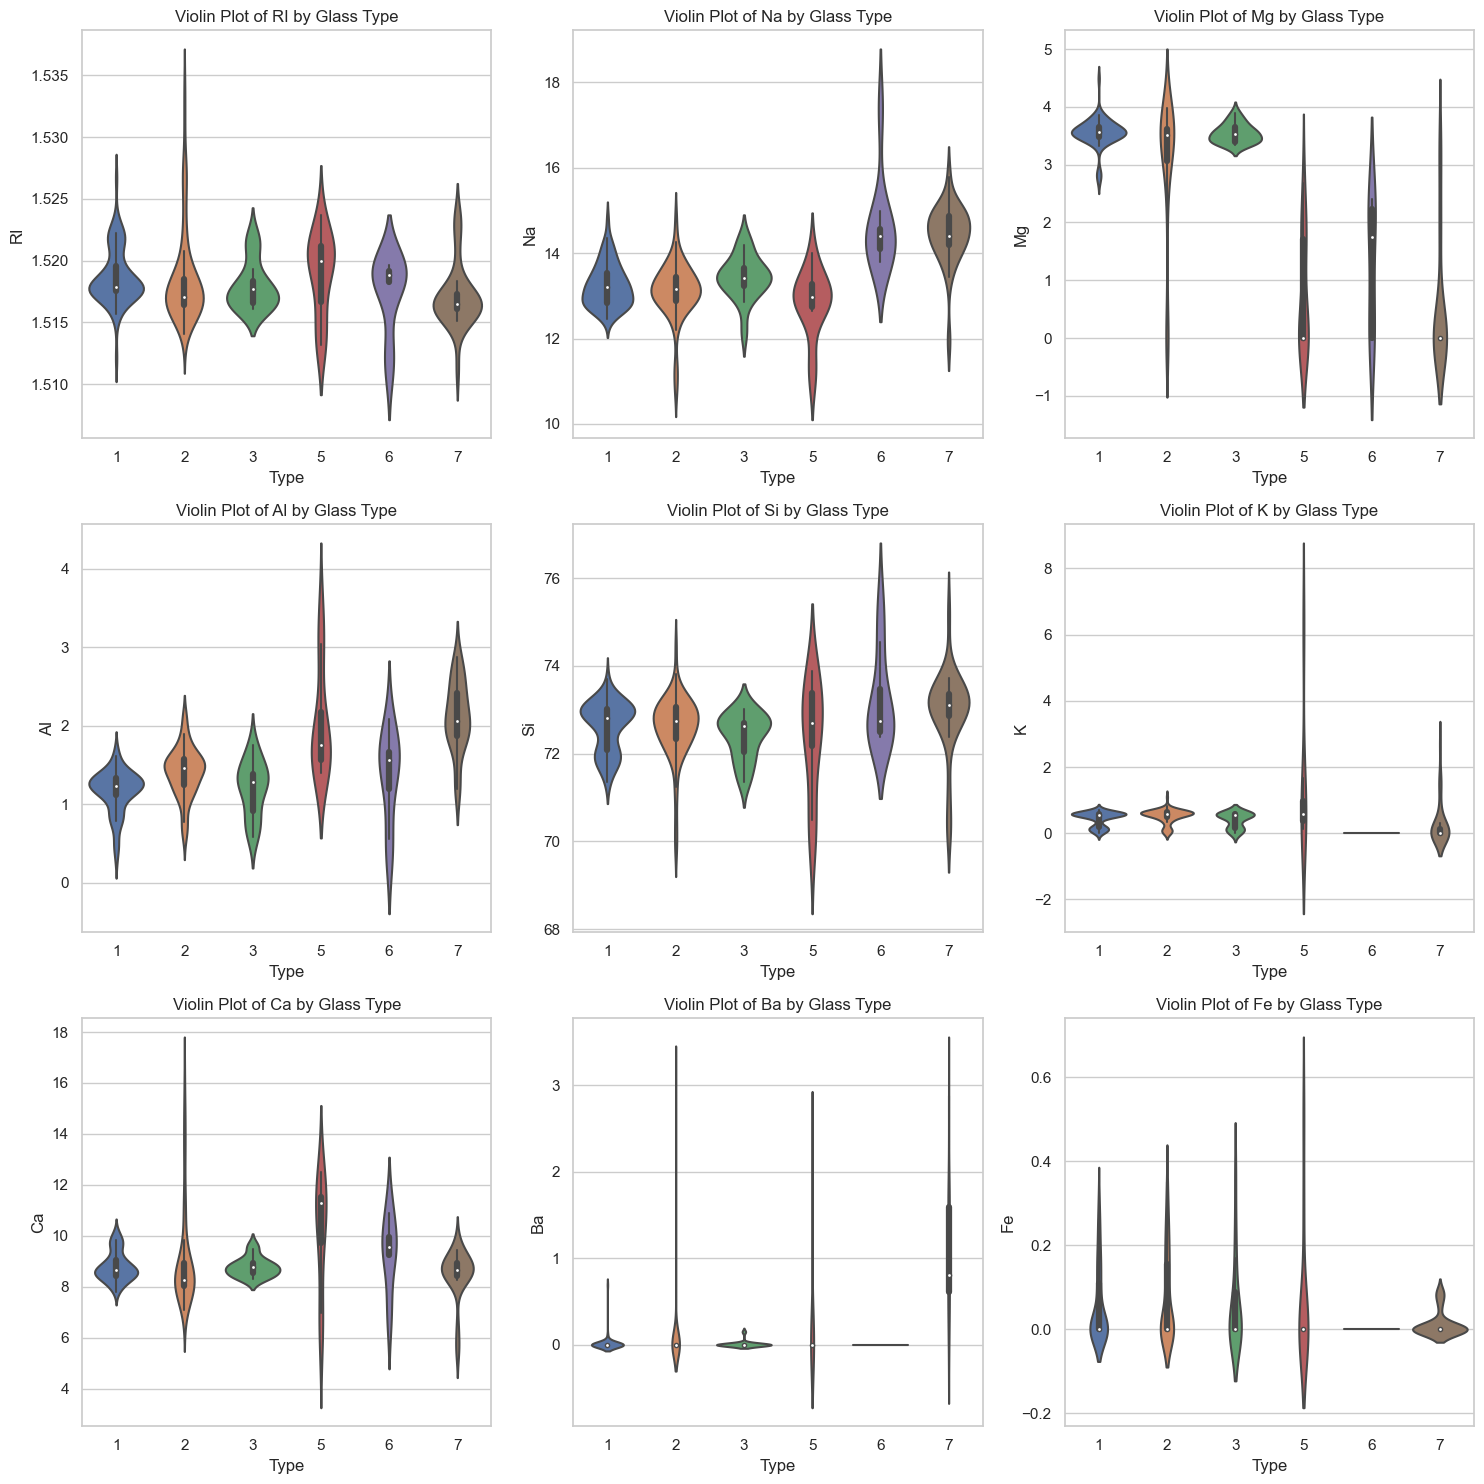

In [20]:
# Violin plot to compare 'Type' with numeric features
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 15))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.violinplot(data = df, x = 'Type', y = df[numerical_columns[i]], ax = ax)
    ax.set_title(f"Violin Plot of {numerical_columns[i]} by Glass Type")
    ax.set_xlabel("Type")
    ax.set_ylabel(numerical_columns[i])
plt.tight_layout()
plt.show()

#### Swarm Plot

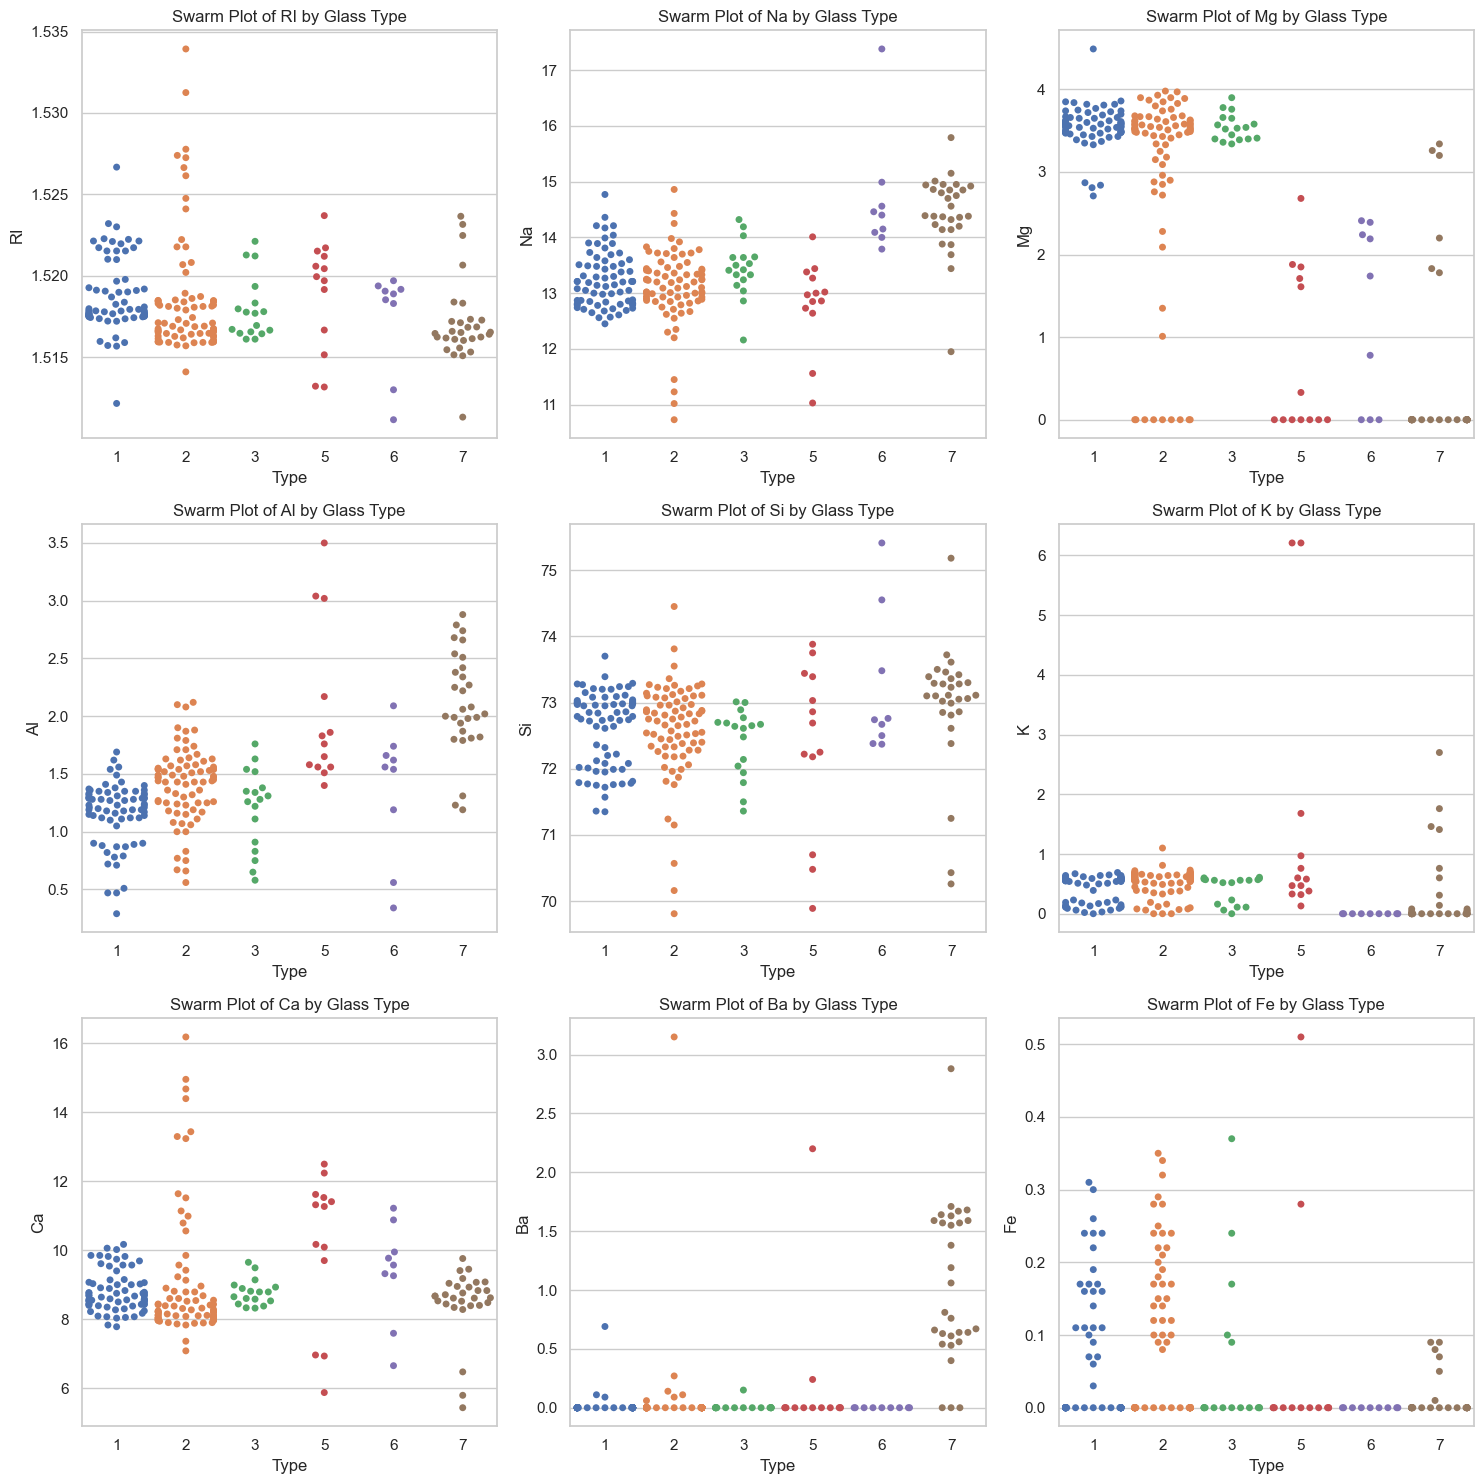

In [21]:
# Swarm plot to compare 'Type' with numeric features
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 15))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.swarmplot(data = df, x = 'Type', y = df[numerical_columns[i]], ax = ax)
    ax.set_title(f"Swarm Plot of {numerical_columns[i]} by Glass Type")
    ax.set_xlabel("Type")
    ax.set_ylabel(numerical_columns[i])
plt.tight_layout()
plt.show()

#### Multivariate Analysis

#### Scatter Plot

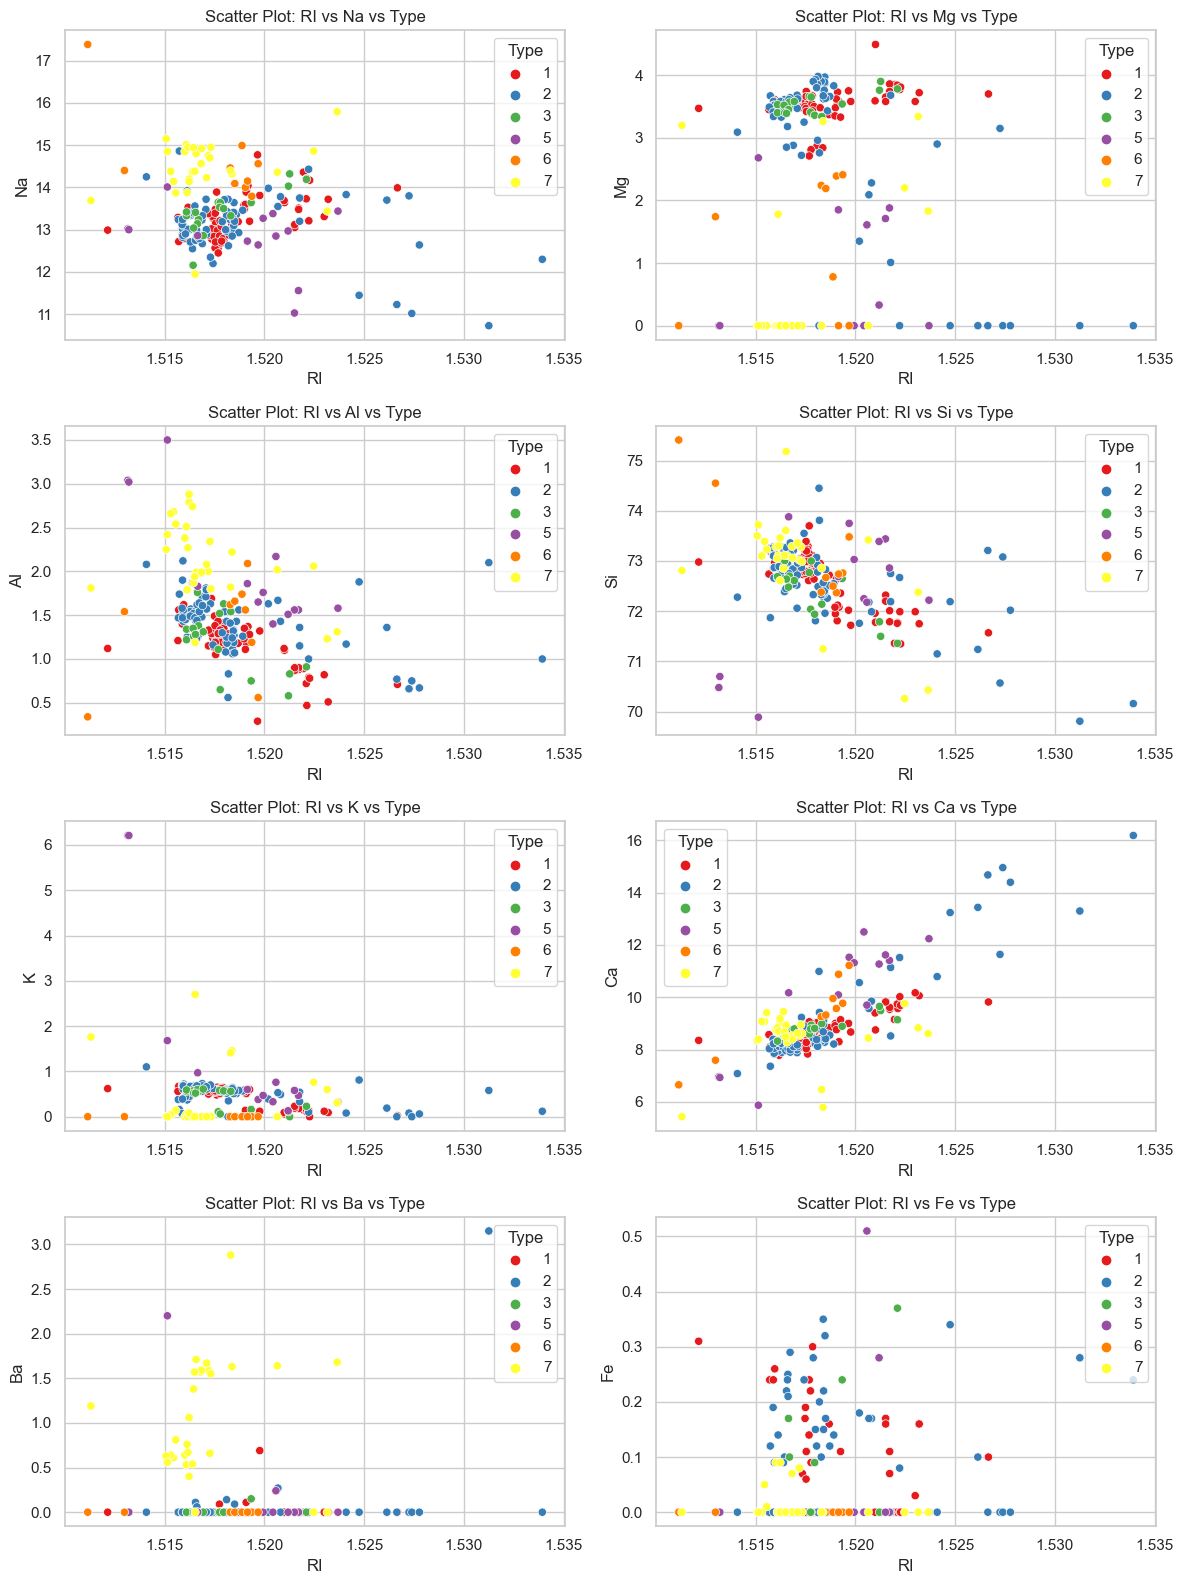

In [22]:
# Multivariate Analysis using scatterplot 
numerical_columns = ["Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(data = df, x = 'RI', y = numerical_columns[i], hue = 'Type', palette = 'Set1', ax = ax)
    ax.set_title(f"Scatter Plot: RI vs {numerical_columns[i]} vs Type")
    ax.set_xlabel("RI")
    ax.set_ylabel(numerical_columns[i])
    ax.legend(title = 'Type')
plt.tight_layout()
plt.show()

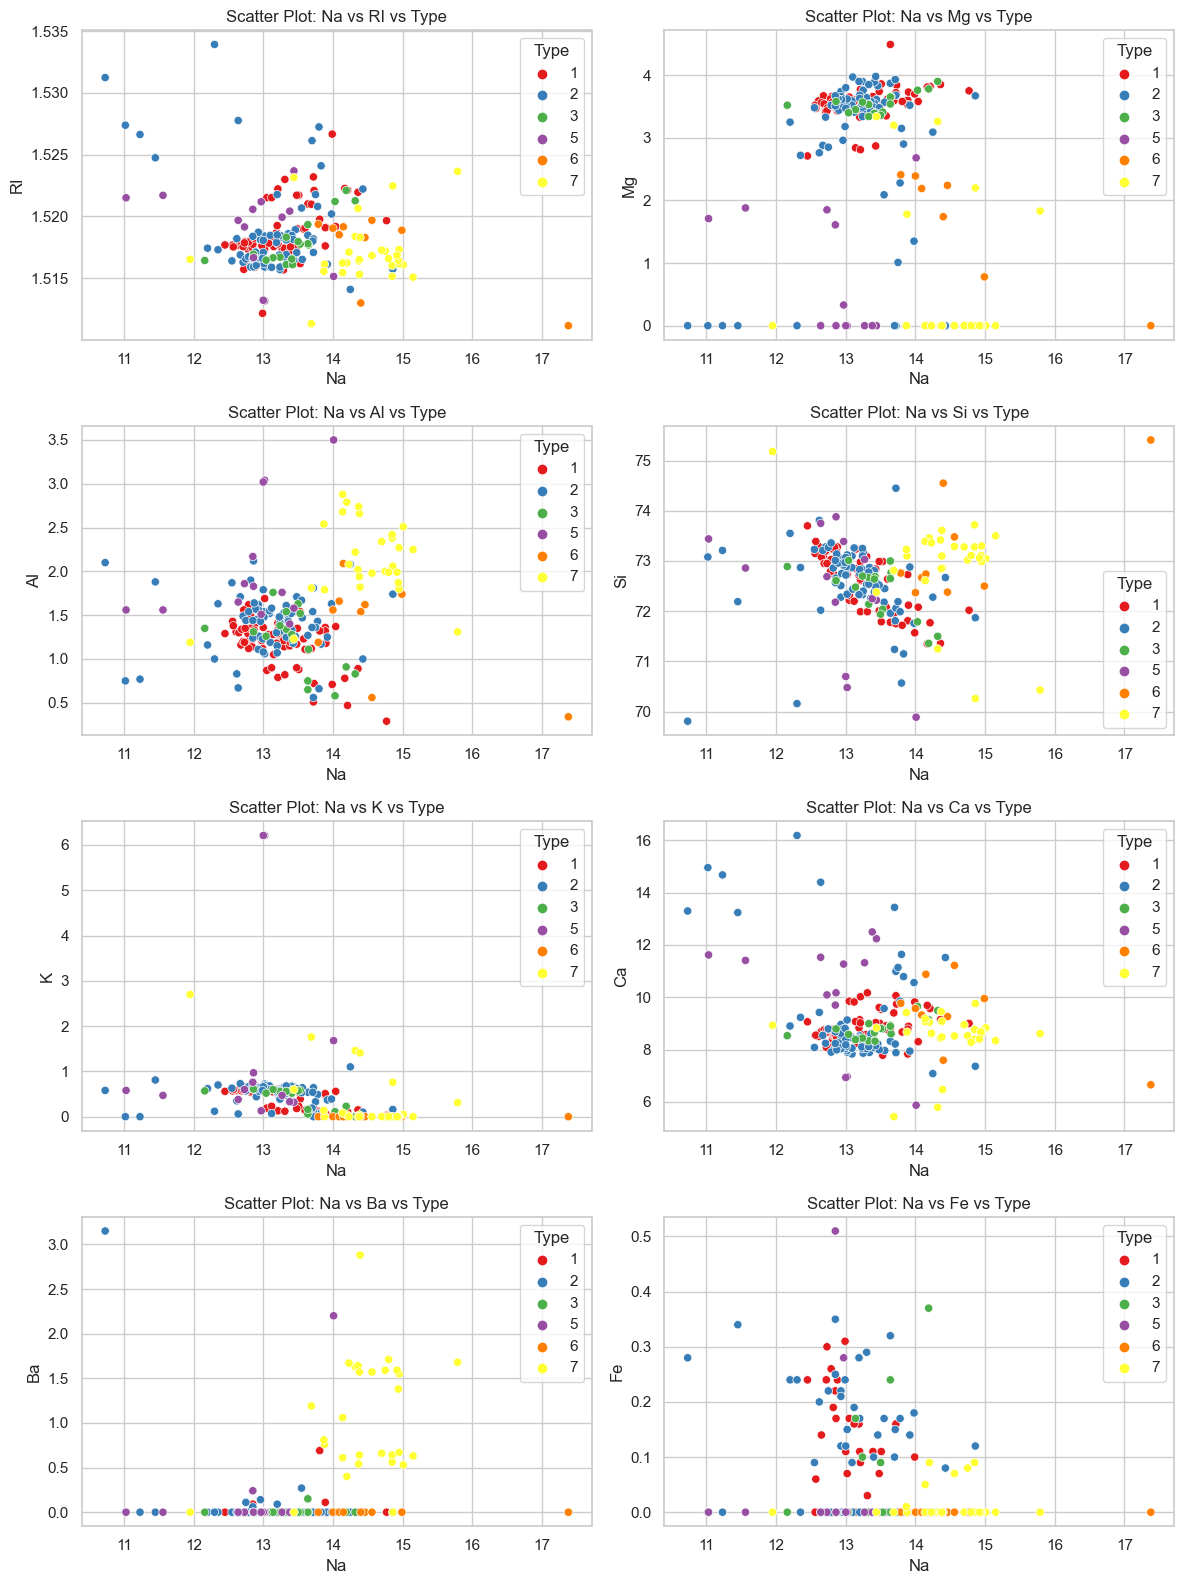

In [23]:
# Multivariate Analysis using scatterplot 
numerical_columns = ["RI", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(data = df, x = 'Na', y = numerical_columns[i], hue = 'Type', palette = 'Set1', ax = ax)
    ax.set_title(f"Scatter Plot: Na vs {numerical_columns[i]} vs Type")
    ax.set_xlabel("Na")
    ax.set_ylabel(numerical_columns[i])
    ax.legend(title = 'Type')
plt.tight_layout()
plt.show()

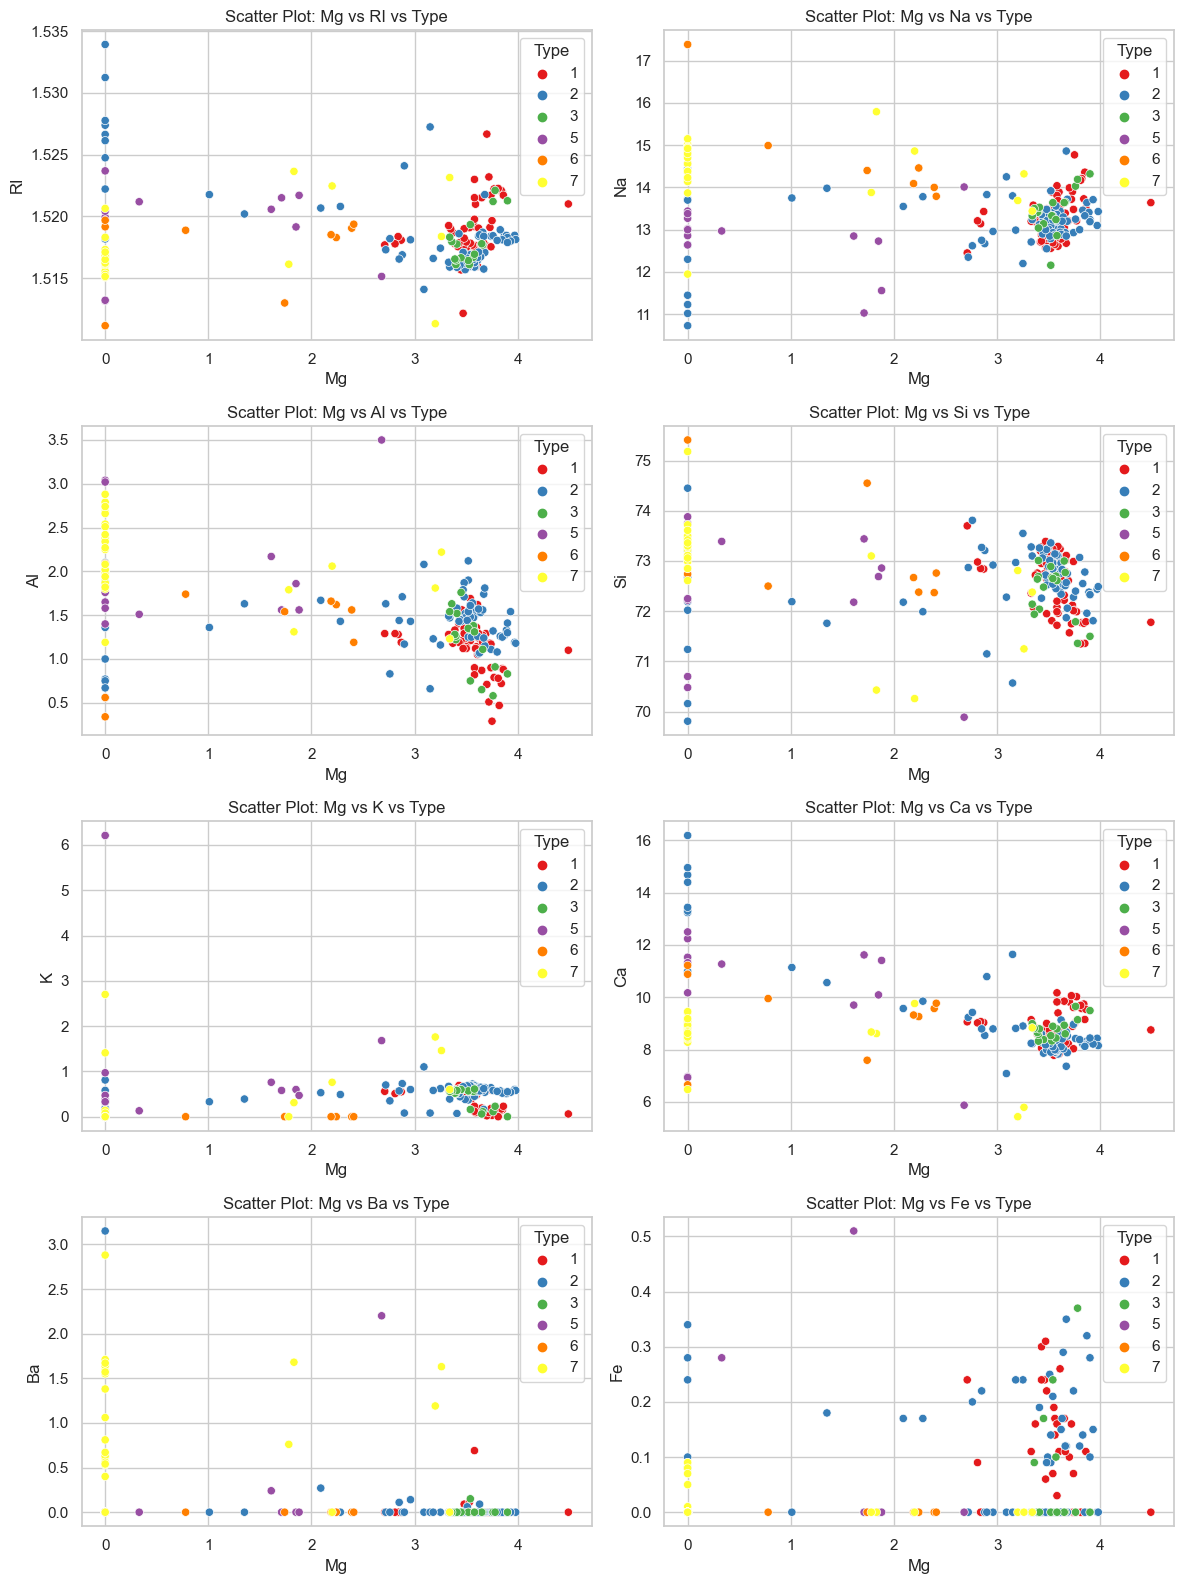

In [24]:
# Multivariate Analysis using scatterplot 
numerical_columns = ["RI", "Na", "Al", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(data = df, x = 'Mg', y = numerical_columns[i], hue = 'Type', palette = 'Set1', ax = ax)
    ax.set_title(f"Scatter Plot: Mg vs {numerical_columns[i]} vs Type")
    ax.set_xlabel("Mg")
    ax.set_ylabel(numerical_columns[i])
    ax.legend(title = 'Type')
plt.tight_layout()
plt.show()

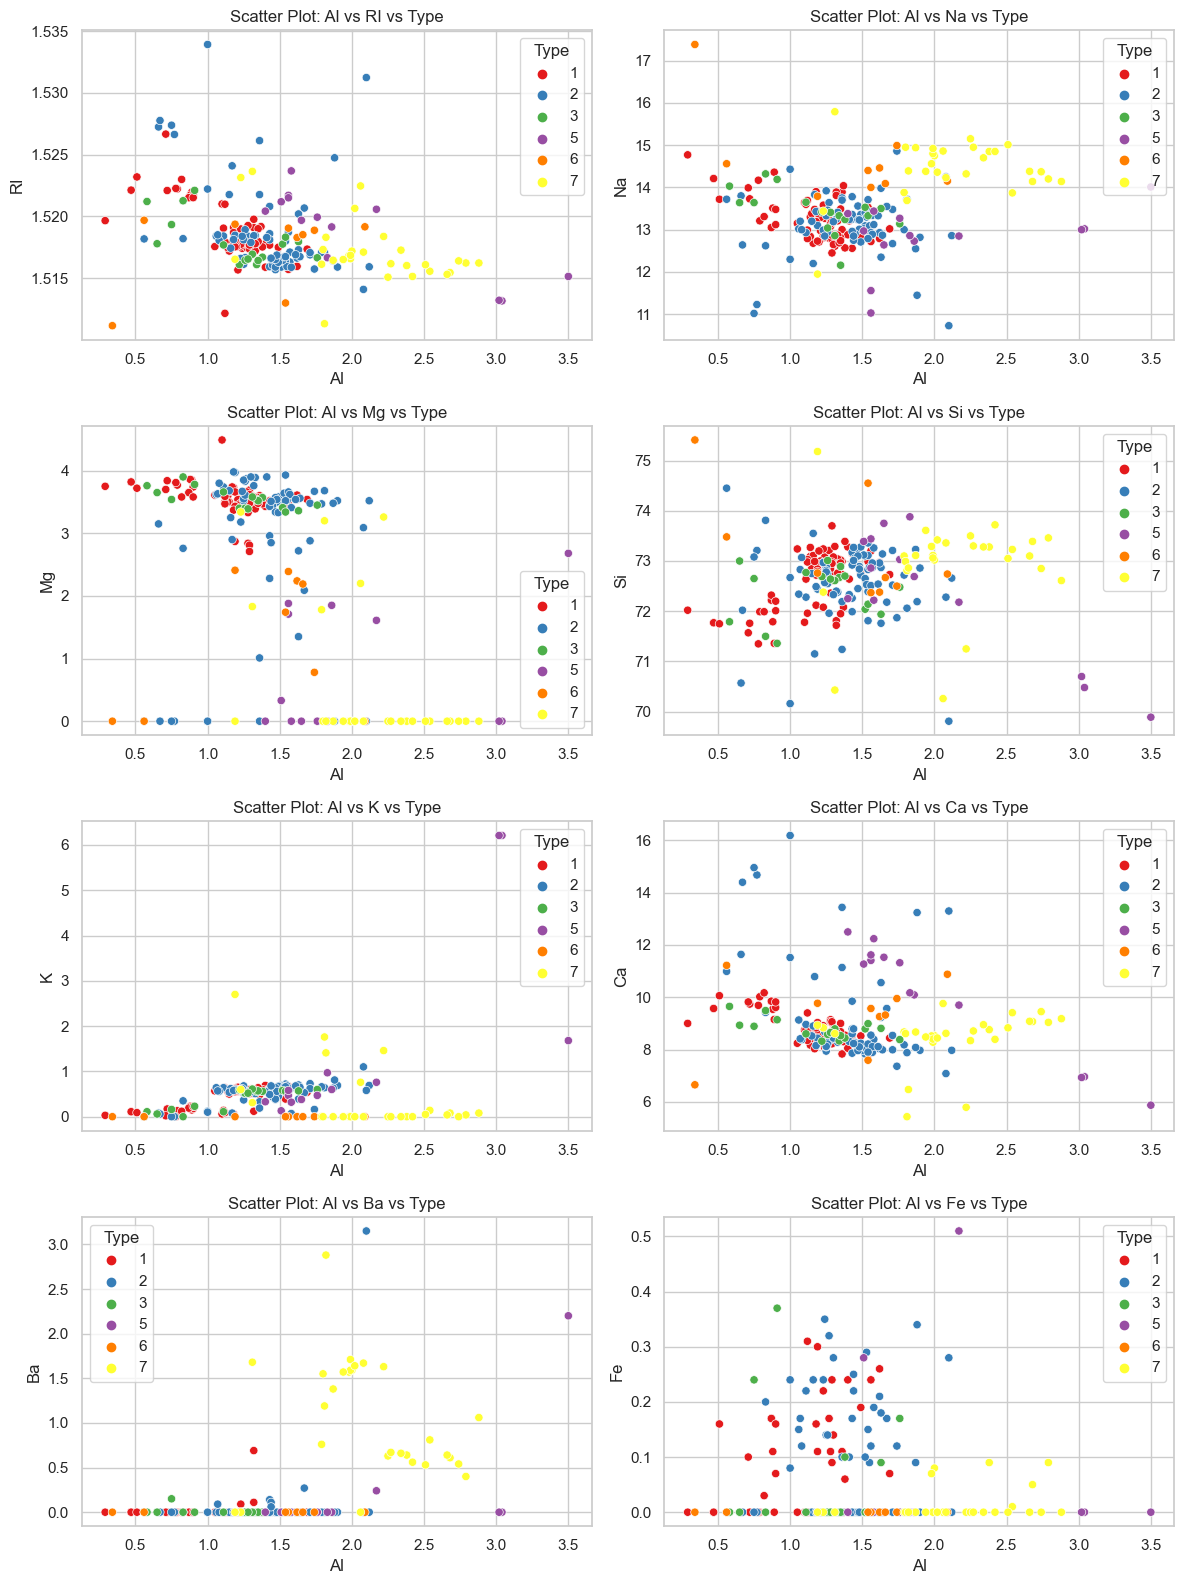

In [25]:
# Multivariate Analysis using scatterplot 
numerical_columns = ["RI", "Na", "Mg", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(data = df, x = 'Al', y = numerical_columns[i], hue = 'Type', palette = 'Set1', ax = ax)
    ax.set_title(f"Scatter Plot: Al vs {numerical_columns[i]} vs Type")
    ax.set_xlabel("Al")
    ax.set_ylabel(numerical_columns[i])
    ax.legend(title = 'Type')
plt.tight_layout()
plt.show()

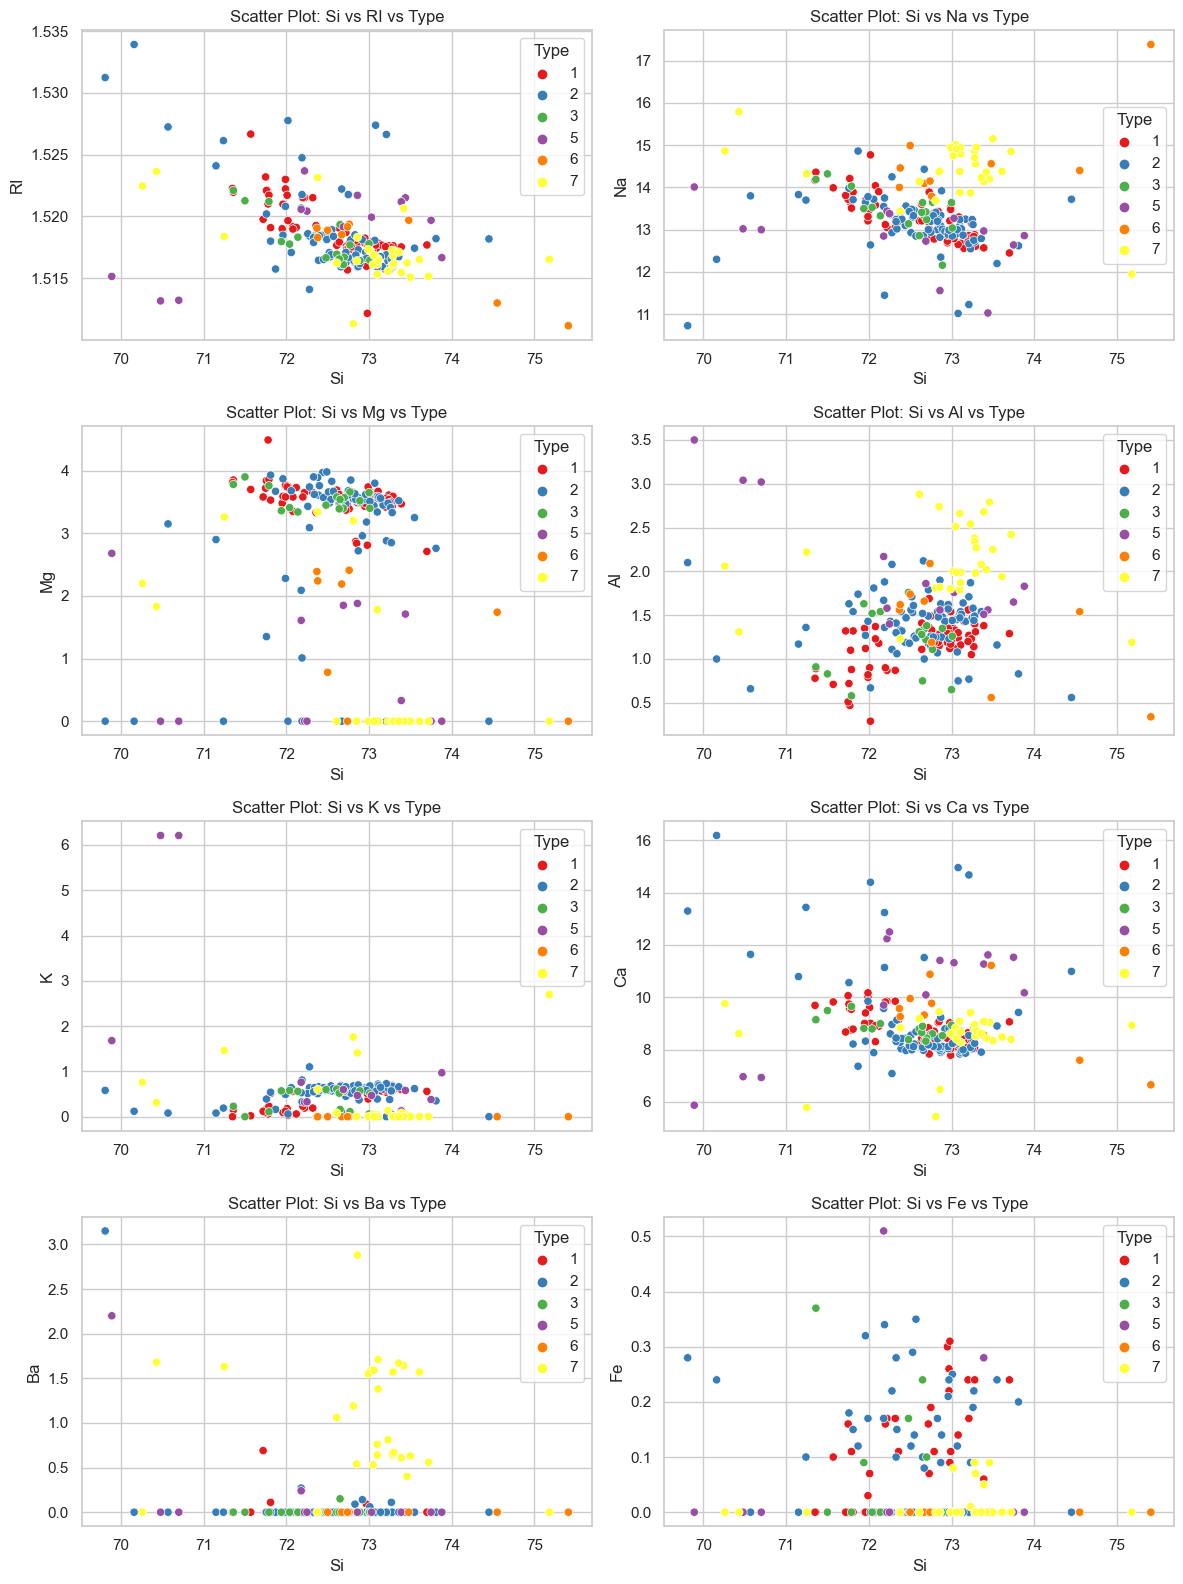

In [26]:
# Multivariate Analysis using scatterplot 
numerical_columns = ["RI", "Na", "Mg", "Al", "K", "Ca", "Ba", "Fe"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(data = df, x = 'Si', y = numerical_columns[i], hue = 'Type', palette = 'Set1', ax = ax)
    ax.set_title(f"Scatter Plot: Si vs {numerical_columns[i]} vs Type")
    ax.set_xlabel("Si")
    ax.set_ylabel(numerical_columns[i])
    ax.legend(title = 'Type')
plt.tight_layout()
plt.show()

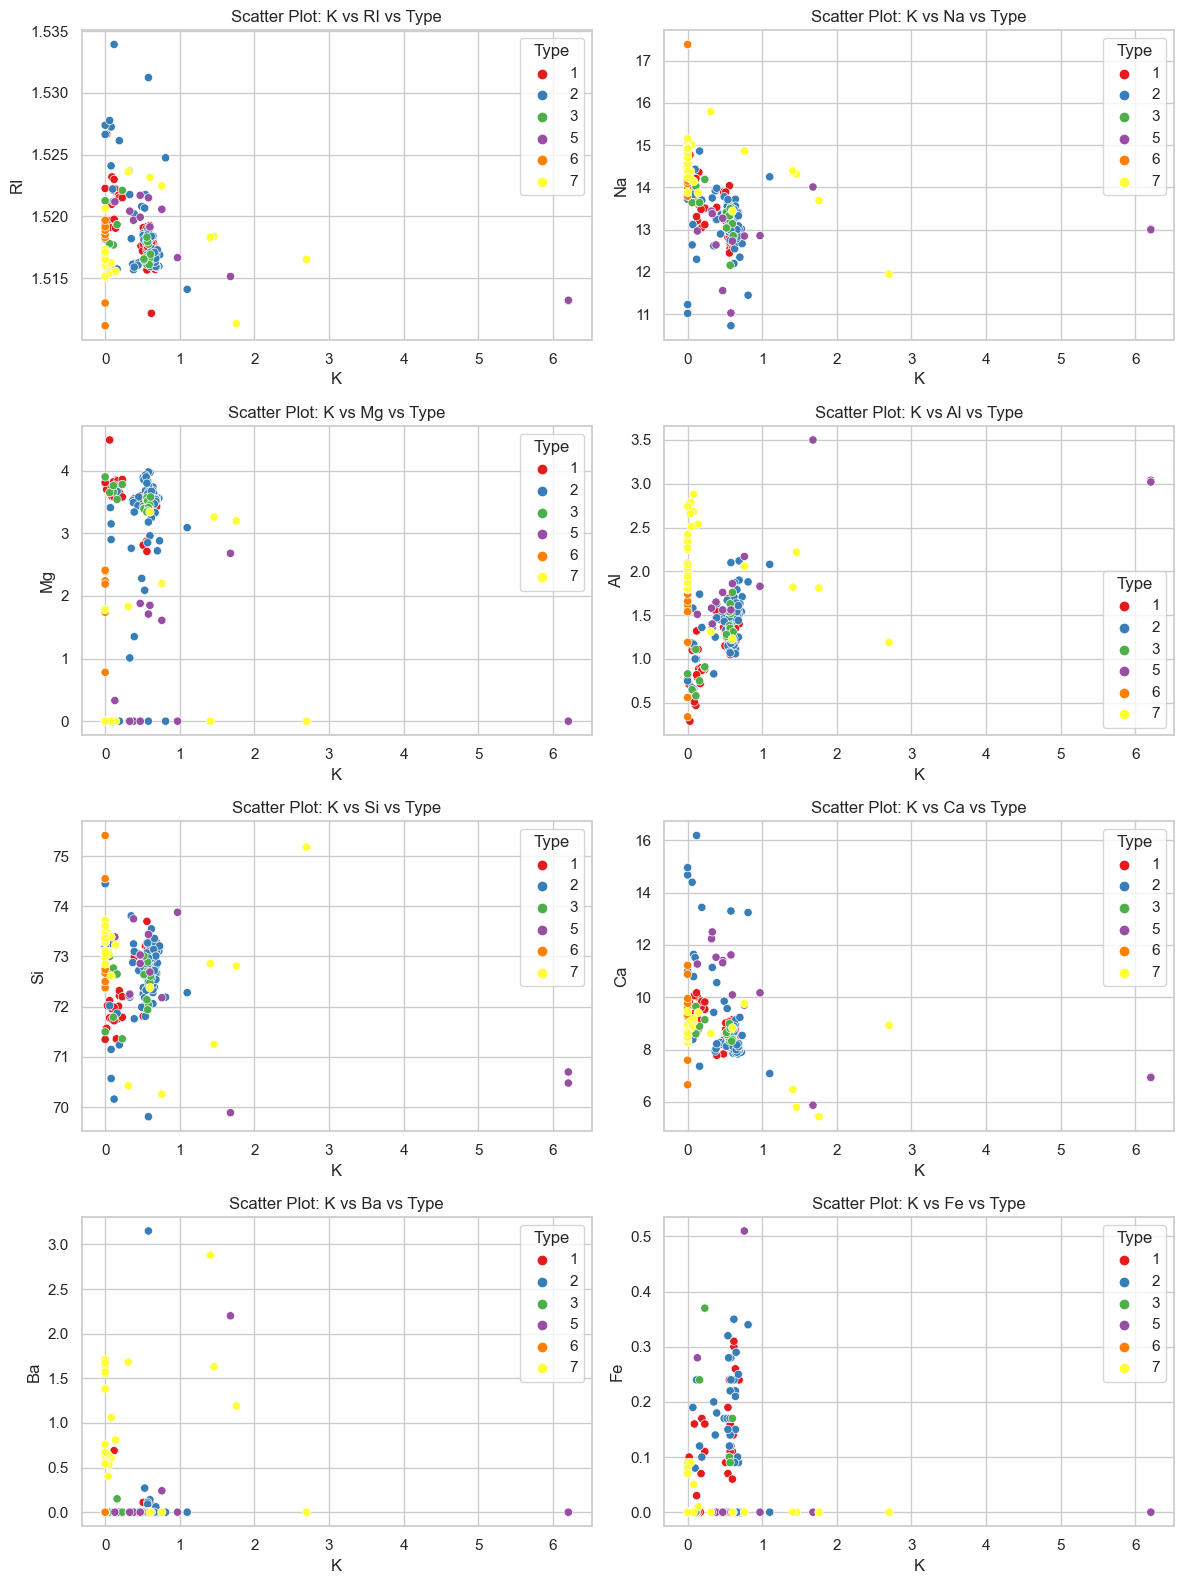

In [27]:
# Multivariate Analysis using scatterplot 
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "Ca", "Ba", "Fe"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(data = df, x = 'K', y = numerical_columns[i], hue = 'Type', palette = 'Set1', ax = ax)
    ax.set_title(f"Scatter Plot: K vs {numerical_columns[i]} vs Type")
    ax.set_xlabel("K")
    ax.set_ylabel(numerical_columns[i])
    ax.legend(title = 'Type')
plt.tight_layout()
plt.show()

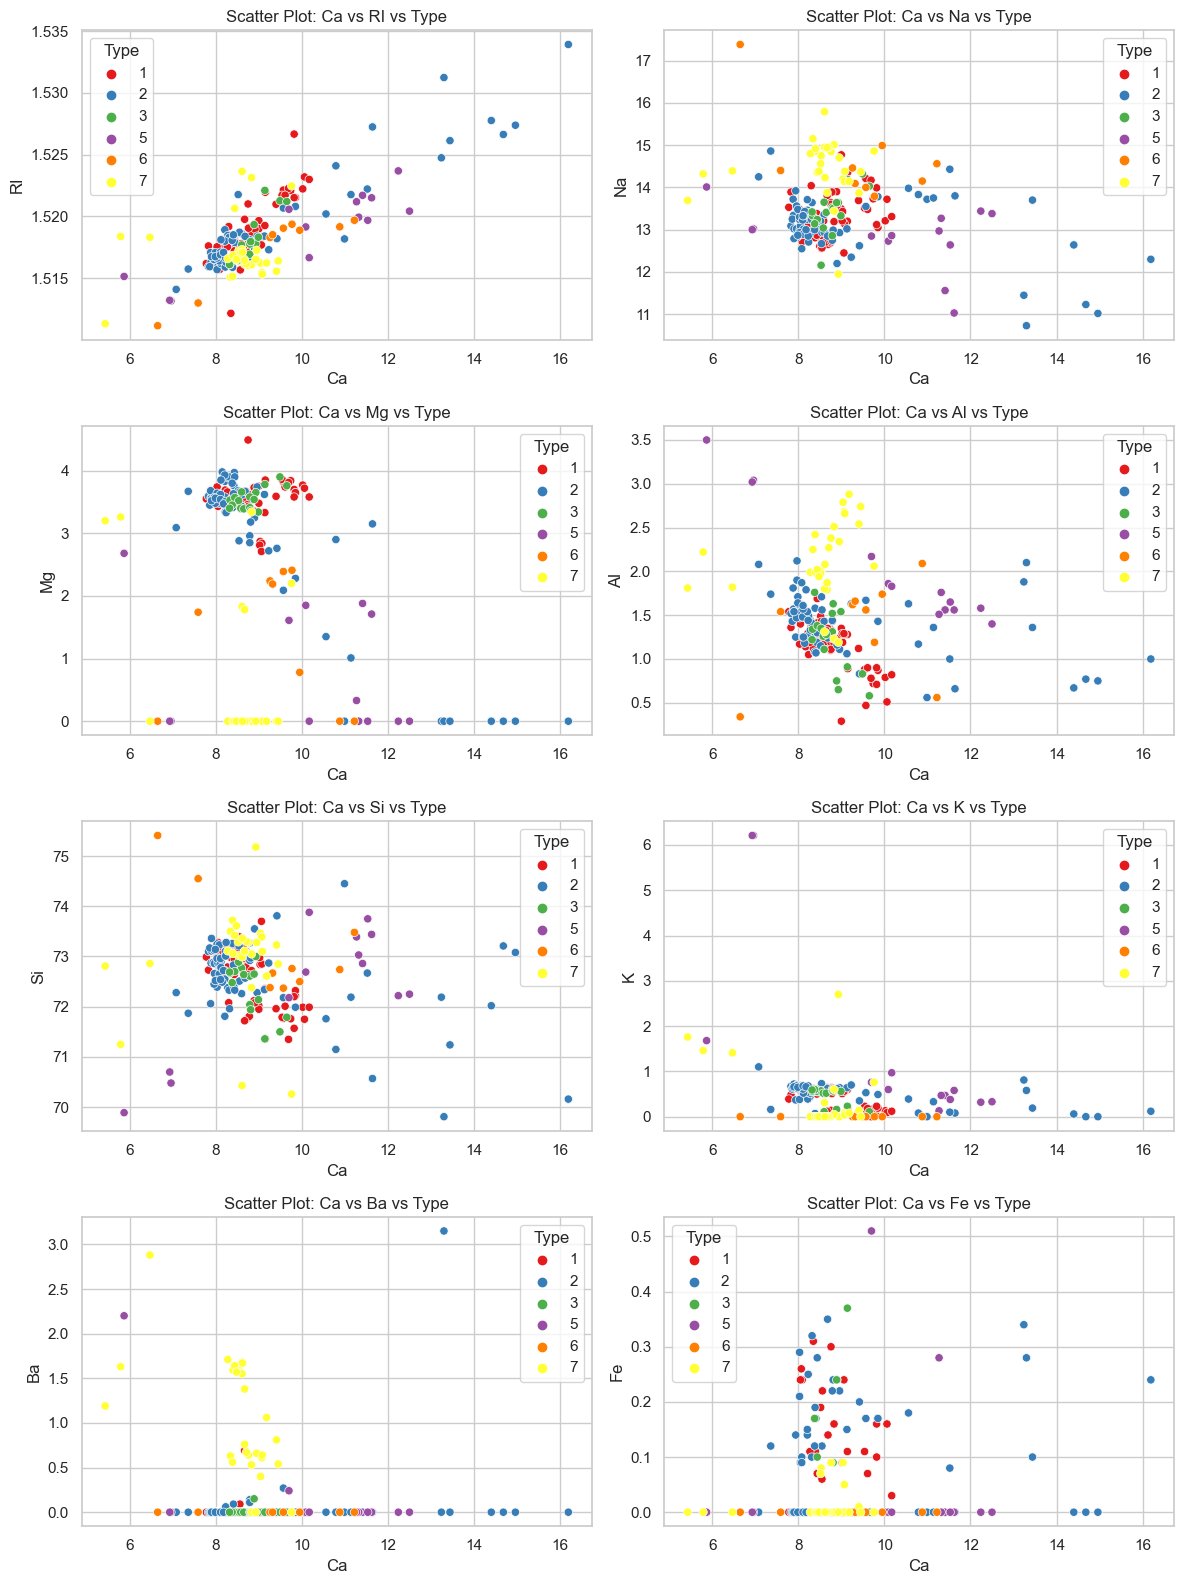

In [28]:
# Multivariate Analysis using scatterplot 
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ba", "Fe"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(data = df, x = 'Ca', y = numerical_columns[i], hue = 'Type', palette = 'Set1', ax = ax)
    ax.set_title(f"Scatter Plot: Ca vs {numerical_columns[i]} vs Type")
    ax.set_xlabel("Ca")
    ax.set_ylabel(numerical_columns[i])
    ax.legend(title = 'Type')
plt.tight_layout()
plt.show()

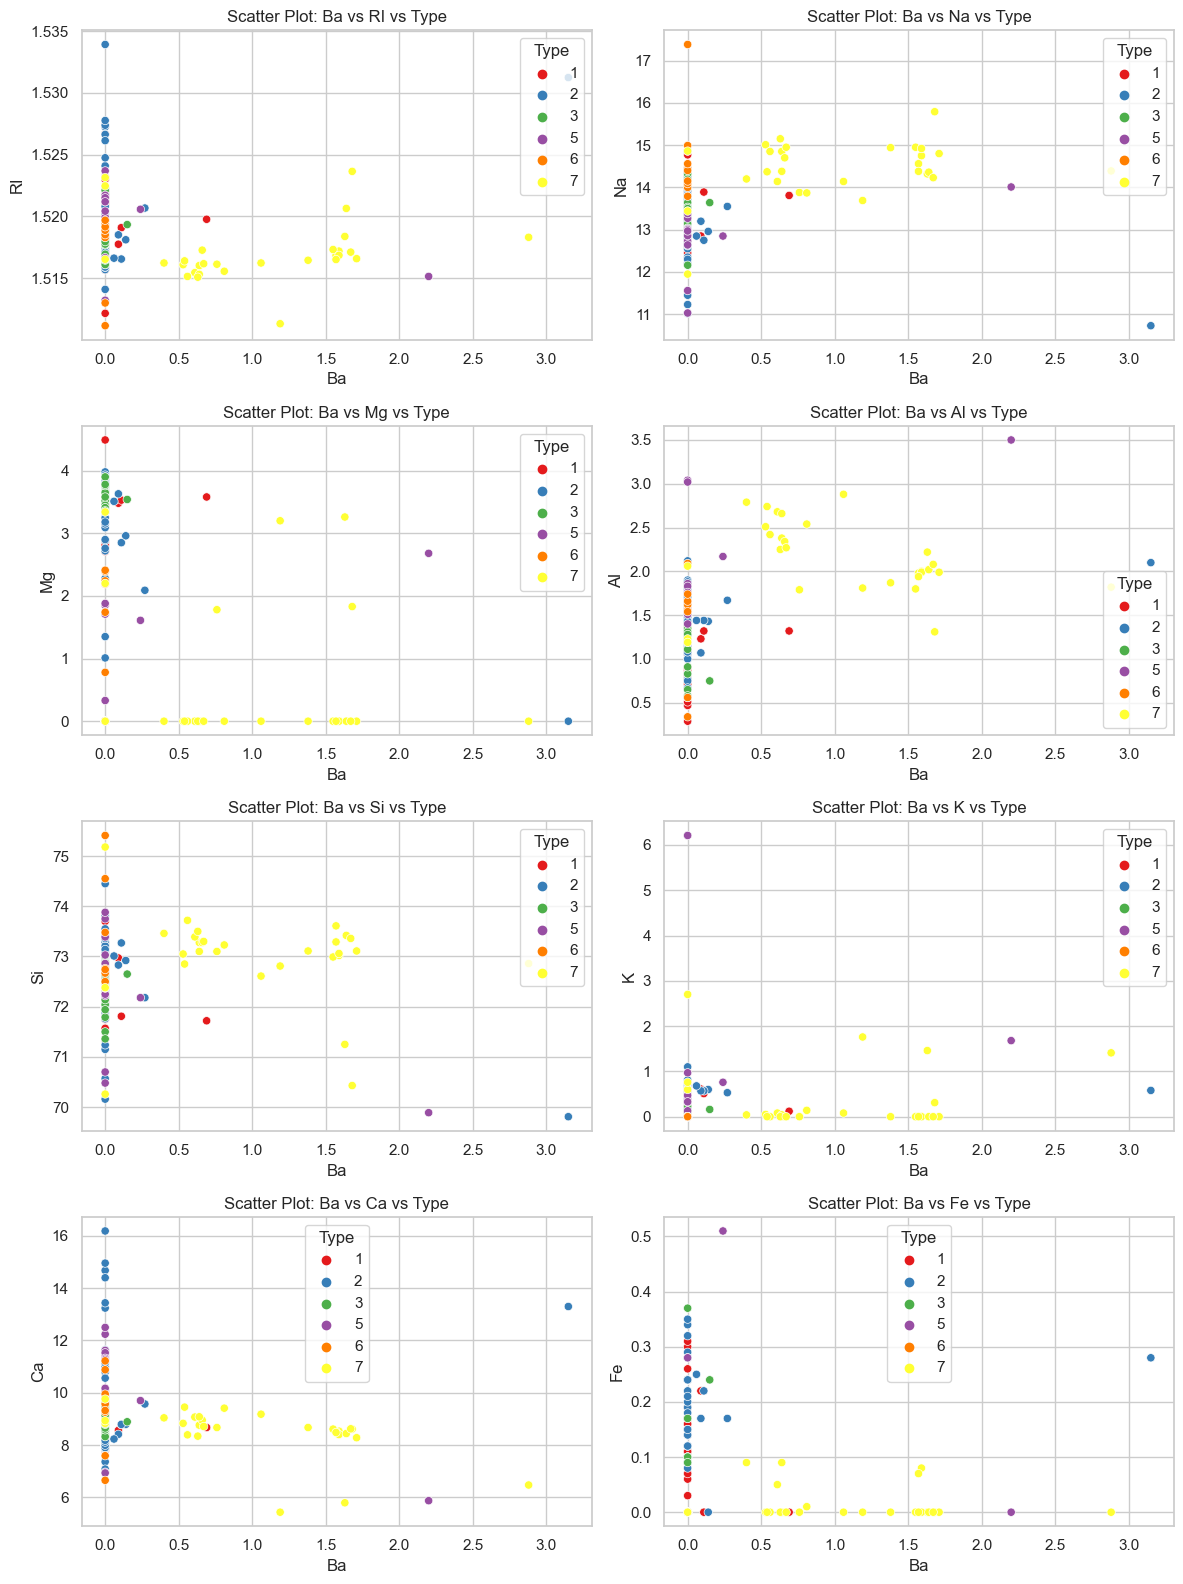

In [29]:
# Multivariate Analysis using scatterplot 
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Fe"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(data = df, x = 'Ba', y = numerical_columns[i], hue = 'Type', palette = 'Set1', ax = ax)
    ax.set_title(f"Scatter Plot: Ba vs {numerical_columns[i]} vs Type")
    ax.set_xlabel("Ba")
    ax.set_ylabel(numerical_columns[i])
    ax.legend(title = 'Type')
plt.tight_layout()
plt.show()

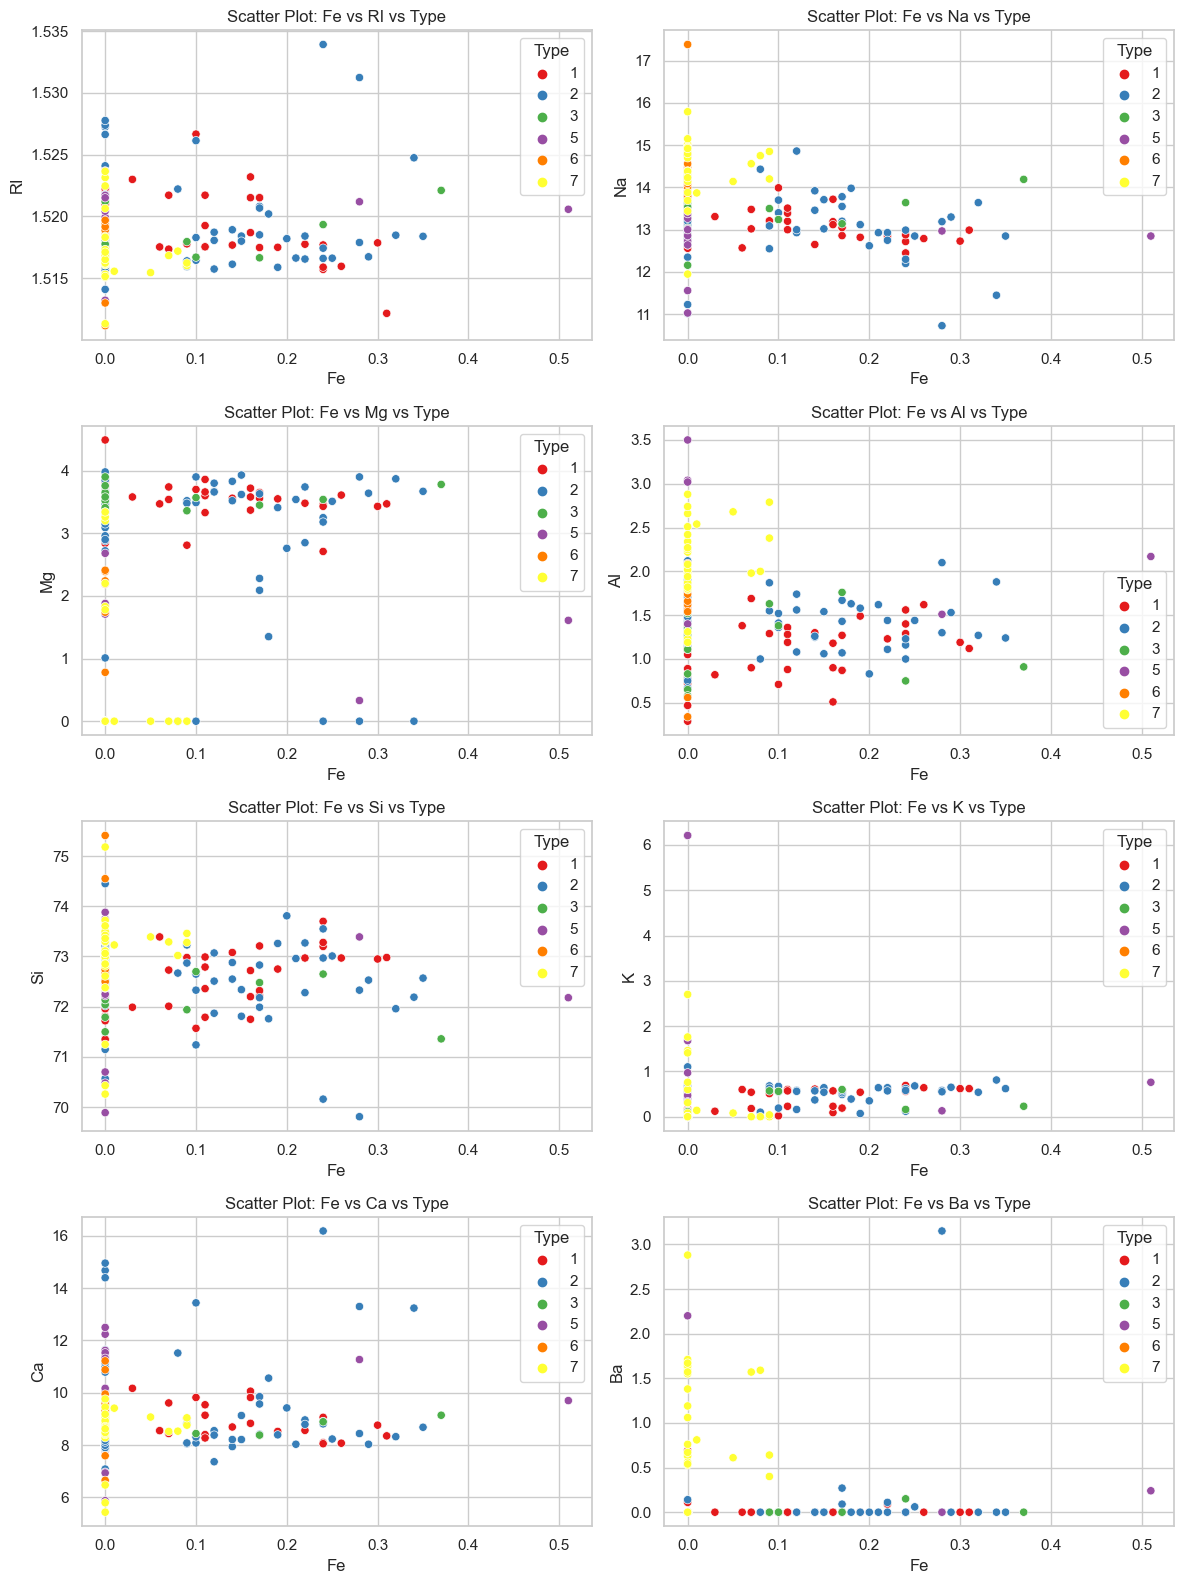

In [30]:
# Multivariate Analysis using scatterplot 
numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba"]
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(data = df, x = 'Fe', y = numerical_columns[i], hue = 'Type', palette = 'Set1', ax = ax)
    ax.set_title(f"Scatter Plot: Fe vs {numerical_columns[i]} vs Type")
    ax.set_xlabel("Fe")
    ax.set_ylabel(numerical_columns[i])
    ax.legend(title = 'Type')
plt.tight_layout()
plt.show()

### Data Preprocessing

#### Data Cleaning

Feature 'ID' is typically considered less significant for predicting type of glass in the context of the glass identification dataset. This feature is not directly related with type of glass and may not provide meaningful information for the prediction task.

In [31]:
df.drop(columns = 'Id', inplace = True)
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7) so it is better to replace classes 1-4 with 0 and classes 5-7 with 1.

In [32]:
# Replacing classes window glass (classes 1-4) by 1 and non-window (classes 5-7) by 1
df['Glass Type'] = [0 if x <= 4 else 1 for x in df['Type']]
df = df.drop('Type', axis = 1)
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Glass Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0           0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0           0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0           0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0           0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0           0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...         ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0           1
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0           1
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0           1
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0           1
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0           1

[214 rows x 10 columns]

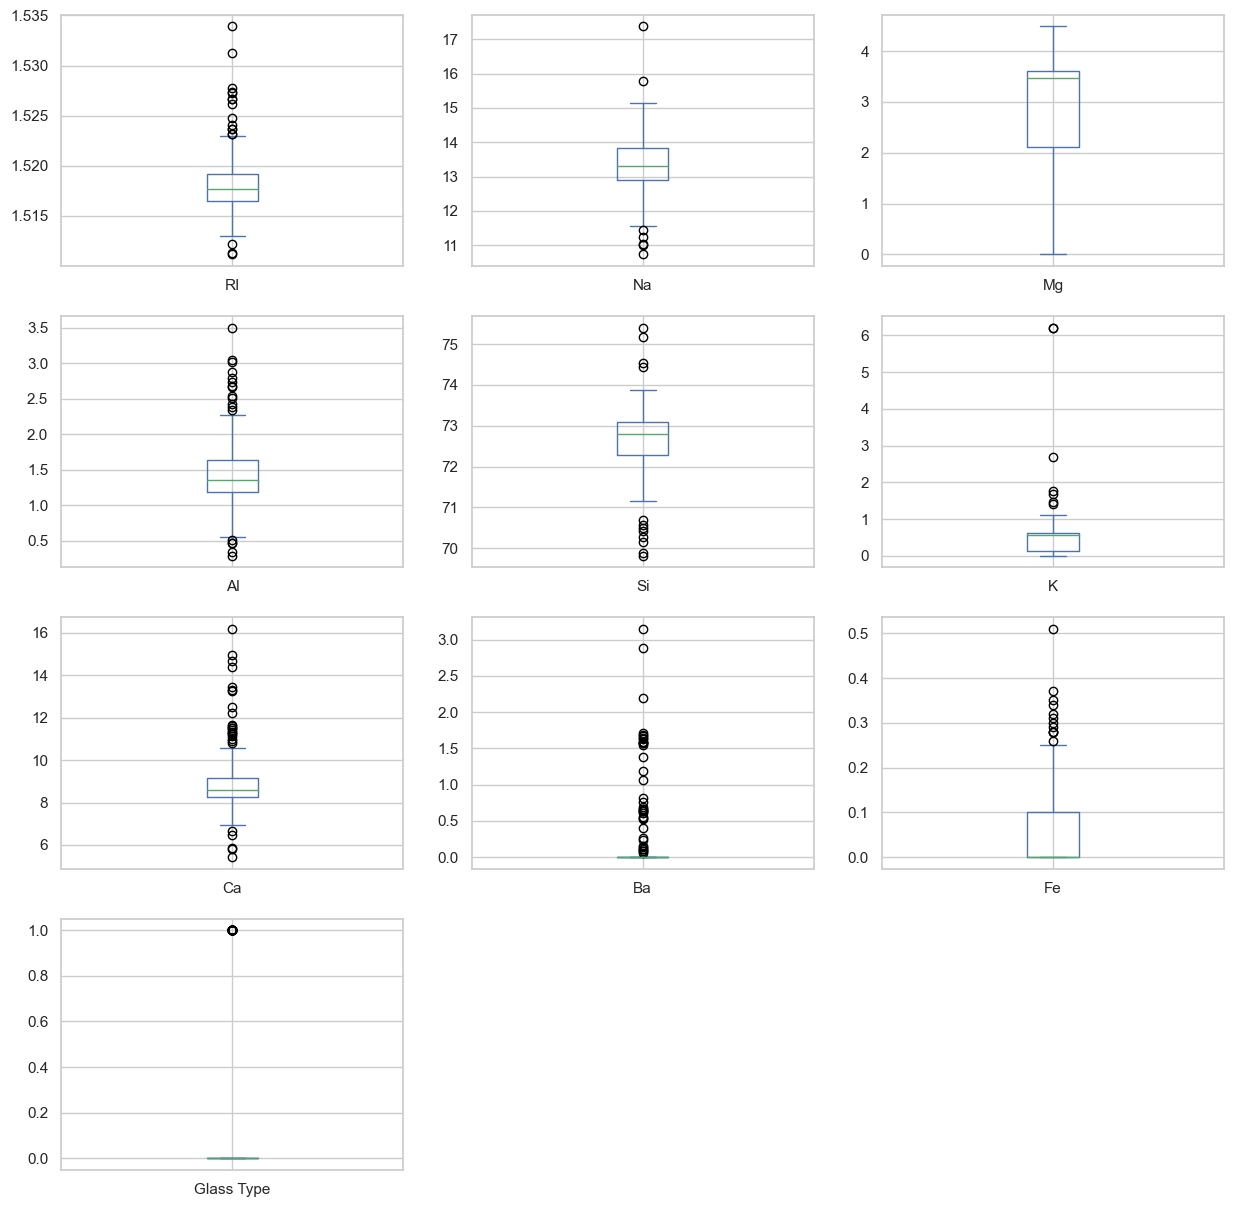

In [33]:
# Cheking for the outliers

# Using boxplot
df.plot(kind = 'box', subplots = True, figsize = (15, 15), layout = (4, 3))
plt.show()

In [34]:
# Using Z-Score
z_score = abs(zscore(df))
z_score

RI        Na        Mg        Al        Si         K        Ca  \
0    0.872868  0.284953  1.254639  0.692442  1.127082  0.671705  0.145766   
1    0.249333  0.591817  0.636168  0.170460  0.102319  0.026213  0.793734   
2    0.721318  0.149933  0.601422  0.190912  0.438787  0.164533  0.828949   
3    0.232831  0.242853  0.698710  0.310994  0.052974  0.112107  0.519052   
4    0.312045  0.169205  0.650066  0.411375  0.555256  0.081369  0.624699   
..        ...       ...       ...       ...       ...       ...       ...   
209  0.704815  0.898681  1.865511  2.881125  0.052974  0.640968  0.157088   
210  0.500178  1.856097  1.865511  1.094342  0.529374  0.763919  0.392276   
211  0.754046  1.168721  1.865511  1.154570  0.995252  0.763919  0.364103   
212  0.612399  1.193270  1.865511  0.993960  1.241133  0.763919  0.335931   
213  0.414363  1.009152  1.865511  1.275028  0.917606  0.763919  0.237327   

           Ba        Fe  Glass Type  
0    0.352877  0.586451    0.559360  
1    0.352877  0.586451    0.559360  
2    0.352877  0.586451    0.559360  
3    0.352877  0.586451    0.559360  
4    0.352877  0.586451    0.559360  
..        ...       ...         ...  
209  1.783978  0.586451    1.787758  
210  2.852405  0.586451    1.787758  
211  2.953200  0.586451    1.787758  
212  2.812087  0.586451    1.787758  
213  3.013677  0.586451    1.787758  

[214 rows x 10 columns]

Outlier are peresent in the dataset.

In [35]:
# Removing Outliers
z = 3
df1 = df[(z_score < z).all(axis = 1)]
df1.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Glass Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0           0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0           0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0           0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0           0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0           0

In [36]:
df1.shape

(194, 10)

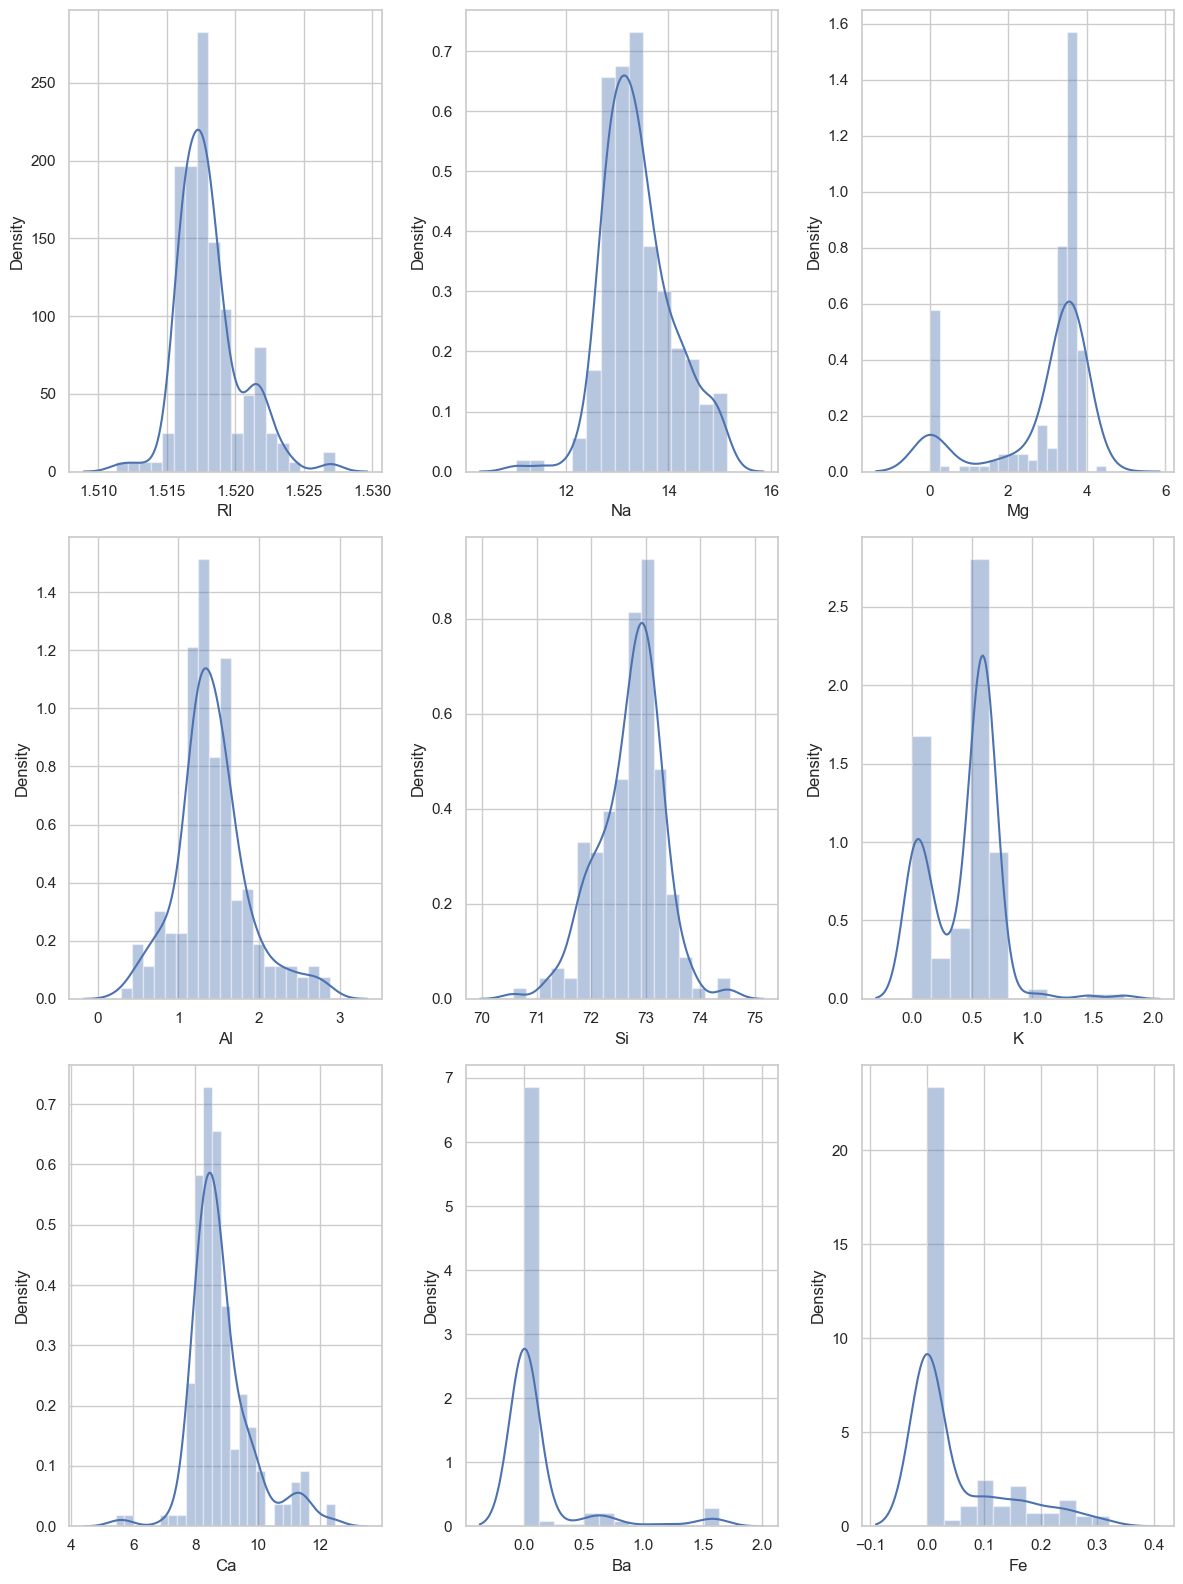

In [37]:
# Checking for the skewness

# Using distplot

numerical_columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12,16))
for i in range(len(numerical_columns)):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.distplot(df1[numerical_columns[i]], ax = ax)
plt.tight_layout()
plt.show()

In [38]:
# Using skew() method

df1.skew()

RI            0.952733
Na            0.371482
Mg           -1.528849
Al            0.658259
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            3.188587
Fe            1.486479
Glass Type    1.463837
dtype: float64

Mg has a skewness of approximately -1.53, indicating it is highly skewed to the left (negatively skewed).

Al has a skewness of approximately 0.66, indicating it is moderately skewed to the right (positively skewed).

Ba has a skewness of approximately 3.19, indicating it is highly skewed to the right (positively skewed).

Fe has a skewness of approximately 1.49, indicating it is highly skewed to the right (positively skewed).

In [39]:
# List of features with high skewness
high_skewed_columns = ['Mg', 'Al', 'Ba', 'Fe']
transformed_df1 = df1.copy()
transformed_df2 = df1.copy()
transformed_df3 = df1.copy()
transformed_df4 = df1.copy()
transformed_df5 = df1.copy()
transformed_df6 = df1.copy()
transformed_df7 = df1.copy()

# Apply different transformations

# Log Transformation
transformed_df1[high_skewed_columns] = np.log1p(df1[high_skewed_columns])

# Square Root Transformation
transformed_df2[high_skewed_columns] = np.sqrt(df1[high_skewed_columns])

# Box-Cox Transformation
for column in high_skewed_columns:
    transformed_df3[column], lambda_value = boxcox(df1[column] + 1)  # Adding 1 to handle zero and negative values

# Reciprocal Transformation
transformed_df4[high_skewed_columns] = 1 / (df1[high_skewed_columns] + 1)  # Adding 1 to handle zero values

# Exponential Transformation
transformed_df5[high_skewed_columns] = np.exp(df1[high_skewed_columns])

# Power Transformation
transformed_df6[high_skewed_columns] = df1[high_skewed_columns] ** 2
transformed_df7[high_skewed_columns] = df1[high_skewed_columns] ** 3

In [40]:
transformed_df1.skew()

RI            0.952733
Na            0.371482
Mg           -1.757217
Al           -0.168599
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            2.827921
Fe            1.404443
Glass Type    1.463837
dtype: float64

In [41]:
transformed_df2.skew()

RI            0.952733
Na            0.371482
Mg           -1.798777
Al           -0.094727
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            2.465013
Fe            1.007885
Glass Type    1.463837
dtype: float64

In [42]:
transformed_df3.skew()

RI            0.952733
Na            0.371482
Mg           -1.026009
Al            0.014042
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            1.971225
Fe            0.858856
Glass Type    1.463837
dtype: float64

In [43]:
transformed_df4.skew()

RI            0.952733
Na            0.371482
Mg            1.905499
Al            1.044029
Si           -0.425450
K             0.303175
Ca            1.077962
Ba           -2.559586
Fe           -1.330753
Glass Type    1.463837
dtype: float64

In [44]:
transformed_df5.skew()

RI            0.952733
Na            0.371482
Mg           -0.385514
Al            2.598600
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            3.882497
Fe            1.590693
Glass Type    1.463837
dtype: float64

In [45]:
transformed_df6.skew()

RI            0.952733
Na            0.371482
Mg           -1.122806
Al            1.861232
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            4.118103
Fe            2.475647
Glass Type    1.463837
dtype: float64

Boxcox transformation reduced the skewness to the maximum extent therefore, the features in transformed_df3 exhibit reduced skewness.

In [46]:
df2 = transformed_df3
df2.head()

RI     Na         Mg        Al     Si     K    Ca   Ba   Fe  \
0  1.52101  13.64  46.729959  0.804433  71.78  0.06  8.75  0.0  0.0   
1  1.51761  13.89  27.920871  0.943093  72.73  0.48  7.83  0.0  0.0   
2  1.51618  13.53  27.043850  1.032212  72.99  0.39  7.78  0.0  0.0   
3  1.51766  13.21  29.545347  0.906991  72.61  0.57  8.22  0.0  0.0   
4  1.51742  13.27  28.276750  0.880670  73.08  0.55  8.07  0.0  0.0   

   Glass Type  
0           0  
1           0  
2           0  
3           0  
4           0

In [47]:
# Checking the correalation coefficient matrix
correlation_coefficient = df2.corr()
correlation_coefficient

RI        Na        Mg        Al        Si         K  \
RI          1.000000  0.050760  0.064225 -0.545583 -0.609011 -0.368238   
Na          0.050760  1.000000 -0.409922  0.191347 -0.234718 -0.612183   
Mg          0.064225 -0.409922  1.000000 -0.555727 -0.395402  0.416613   
Al         -0.545583  0.191347 -0.555727  1.000000  0.347749  0.069369   
Si         -0.609011 -0.234718 -0.395402  0.347749  1.000000  0.072579   
K          -0.368238 -0.612183  0.416613  0.069369  0.072579  1.000000   
Ca          0.690650  0.019987 -0.458332 -0.244243 -0.165712 -0.500579   
Ba         -0.227301  0.529551 -0.568588  0.555390  0.187263 -0.303226   
Fe          0.025165 -0.155900  0.102689 -0.082697 -0.006004  0.052508   
Glass Type -0.060410  0.463723 -0.826772  0.563197  0.282746 -0.396495   

                  Ca        Ba        Fe  Glass Type  
RI          0.690650 -0.227301  0.025165   -0.060410  
Na          0.019987  0.529551 -0.155900    0.463723  
Mg         -0.458332 -0.568588  0.102689   -0.826772  
Al         -0.244243  0.555390 -0.082697    0.563197  
Si         -0.165712  0.187263 -0.006004    0.282746  
K          -0.500579 -0.303226  0.052508   -0.396495  
Ca          1.000000 -0.116099  0.001700    0.288044  
Ba         -0.116099  1.000000 -0.014902    0.598924  
Fe          0.001700 -0.014902  1.000000   -0.202450  
Glass Type  0.288044  0.598924 -0.202450    1.000000

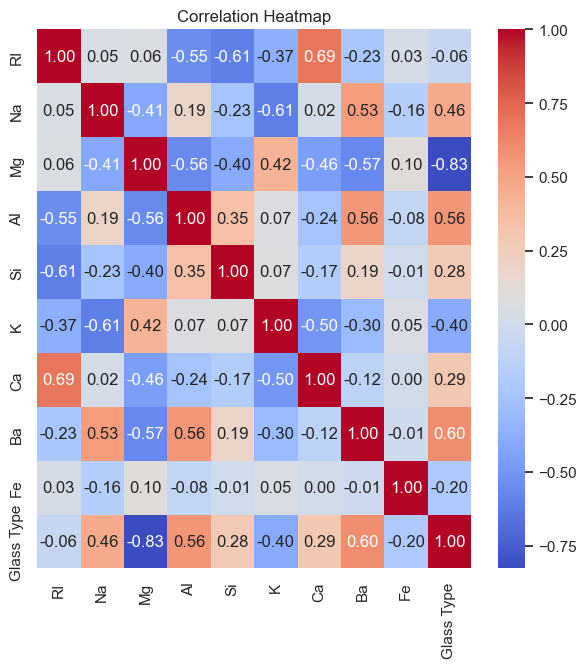

In [48]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (7, 7))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

We can conclude from the heatmap that- 

RI and Al, RI and Si, RI and Mg, RI and K, Na and K, Mg and Al, Mg and Ba, Mg and Glass Type are negatively correlated to each other.

RI and Ca, Na and Ba, Na and Glass Type, Al and Ba, Al and Glass Type, Ba and Glass Type are positively correlated to each other.

In [49]:
# Extracting features and target from dataset
features = df2.drop(columns = ['Glass Type'])
target = df2['Glass Type']

#### Feature Scaling

In [50]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df2 = scaler.fit_transform(features)

In [51]:
df3 = pd.DataFrame(scaled_df2, columns = features.columns[:])
df3.head()

RI        Na        Mg        Al        Si         K        Ca  \
0  1.291781  0.332127  2.295067 -0.705895 -1.612464 -1.319609 -0.075653   
1 -0.197832  0.704398  0.587338 -0.073256  0.016082  0.172091 -1.008147   
2 -0.824346  0.168328  0.507711  0.333353  0.461790 -0.147559 -1.058826   
3 -0.175926 -0.308179  0.734829 -0.237973 -0.189629  0.491741 -0.612851   
4 -0.281075 -0.218834  0.619650 -0.358065  0.616073  0.420708 -0.764888   

         Ba        Fe  
0 -0.429499 -0.677737  
1 -0.429499 -0.677737  
2 -0.429499 -0.677737  
3 -0.429499 -0.677737  
4 -0.429499 -0.677737

#### Checking the Variance Inflation Factor

In [52]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = df3.columns
vif_data["VIF"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]

# Print the VIF data
print(vif_data)

  Features        VIF
0       RI   5.031180
1       Na   7.071049
2       Mg  15.798190
3       Al   4.296894
4       Si   5.931307
5        K   4.238537
6       Ca  12.500090
7       Ba   2.769341
8       Fe   1.055101


Mg feature has greater value of VIF we need to drop this feature.

In [53]:
# Dropping 'Mg' feature from the dataset 
df3.drop(columns = 'Mg', inplace = True)
df3.head()

RI        Na        Al        Si         K        Ca        Ba  \
0  1.291781  0.332127 -0.705895 -1.612464 -1.319609 -0.075653 -0.429499   
1 -0.197832  0.704398 -0.073256  0.016082  0.172091 -1.008147 -0.429499   
2 -0.824346  0.168328  0.333353  0.461790 -0.147559 -1.058826 -0.429499   
3 -0.175926 -0.308179 -0.237973 -0.189629  0.491741 -0.612851 -0.429499   
4 -0.281075 -0.218834 -0.358065  0.616073  0.420708 -0.764888 -0.429499   

         Fe  
0 -0.677737  
1 -0.677737  
2 -0.677737  
3 -0.677737  
4 -0.677737

In [54]:
# Again Checking for the Variance Inflation Factor

# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = df3.columns
vif_data["VIF"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]

# Print the VIF data
print(vif_data)

  Features       VIF
0       RI  5.030993
1       Na  3.117316
2       Al  2.198972
3       Si  2.629101
4        K  3.041483
5       Ca  3.008044
6       Ba  2.209319
7       Fe  1.054753


Now the VIF values for all the features are in normal range.

In [55]:
# Storing features and target in X and y
X = df3
y = target

#### Finding the best random state

In [56]:
# Finding best random state
max_accuracy = 0
max_random_state = 0
for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    rfc = RandomForestClassifier(random_state = i)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_random_state = i 
print("Best Accuracy score is", max_accuracy*100, "at random state", max_random_state)

Best Accuracy score is 100.0 at random state 109


#### Splitting the dataset into training and testing sets

In [57]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = max_random_state)

#### Different Models for predicting Survival of a passenger

In [58]:
# Using different classification models for predicting Glass Type

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_lr))
print("Classifiction report:", classification_report(y_test, y_pred_lr))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_lr))

Accuracy score: 0.9491525423728814
Classifiction report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.75      0.86        12

    accuracy                           0.95        59
   macro avg       0.97      0.88      0.91        59
weighted avg       0.95      0.95      0.95        59

Confusion matrix: [[47  0]
 [ 3  9]]


In [59]:
# K-Nearest Neighbors
knc_model = KNeighborsClassifier(n_neighbors = 3)
knc_model.fit(X_train, y_train)
y_pred_knc = knc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_knc))
print("Classifiction report:", classification_report(y_test, y_pred_knc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_knc))

Accuracy score: 0.9661016949152542
Classifiction report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.83      0.91        12

    accuracy                           0.97        59
   macro avg       0.98      0.92      0.94        59
weighted avg       0.97      0.97      0.96        59

Confusion matrix: [[47  0]
 [ 2 10]]


In [60]:
# Gaussian Naive Bayes
gnb_model = GaussianNB(var_smoothing = 0.1)
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gnb))
print("Classifiction report:", classification_report(y_test, y_pred_gnb))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gnb))

Accuracy score: 0.9322033898305084
Classifiction report:               precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.79      0.92      0.85        12

    accuracy                           0.93        59
   macro avg       0.88      0.93      0.90        59
weighted avg       0.94      0.93      0.93        59

Confusion matrix: [[44  3]
 [ 1 11]]


In [61]:
# Support Vector Classifier
svc_model = SVC(C = 1.0, kernel = 'rbf', gamma = 'scale')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_svc))
print("Classifiction report:", classification_report(y_test, y_pred_svc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_svc))

Accuracy score: 0.9830508474576272
Classifiction report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.92      0.96        12

    accuracy                           0.98        59
   macro avg       0.99      0.96      0.97        59
weighted avg       0.98      0.98      0.98        59

Confusion matrix: [[47  0]
 [ 1 11]]


In [62]:
# Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc_model.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_dtc))
print("Classifiction report:", classification_report(y_test, y_pred_dtc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_dtc))

Accuracy score: 0.9661016949152542
Classifiction report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.92      0.92      0.92        12

    accuracy                           0.97        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.97      0.97      0.97        59

Confusion matrix: [[46  1]
 [ 1 11]]


In [63]:
# Random Forest Classifier 
rfc_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, max_depth = 10, random_state = 42)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("Classifiction report:", classification_report(y_test, y_pred_rfc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_rfc))

Accuracy score: 0.9661016949152542
Classifiction report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.83      0.91        12

    accuracy                           0.97        59
   macro avg       0.98      0.92      0.94        59
weighted avg       0.97      0.97      0.96        59

Confusion matrix: [[47  0]
 [ 2 10]]


In [64]:
# Extra Trees Classifier
etc_model = ExtraTreesClassifier(criterion = 'entropy', n_estimators = 100, max_depth = 10, random_state = 42)
etc_model.fit(X_train, y_train)
y_pred_etc = etc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_etc))
print("Classifiction report:", classification_report(y_test, y_pred_etc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_etc))

Accuracy score: 0.9830508474576272
Classifiction report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.92      0.96        12

    accuracy                           0.98        59
   macro avg       0.99      0.96      0.97        59
weighted avg       0.98      0.98      0.98        59

Confusion matrix: [[47  0]
 [ 1 11]]


In [65]:
# AdaBoost Classifier
abc_model = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
abc_model.fit(X_train, y_train)
y_pred_abc = abc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_abc))
print("Classifiction report:", classification_report(y_test, y_pred_abc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_abc))

Accuracy score: 1.0
Classifiction report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        12

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Confusion matrix: [[47  0]
 [ 0 12]]


In [66]:
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gbc))
print("Classifiction report:", classification_report(y_test, y_pred_gbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gbc))

Accuracy score: 0.9661016949152542
Classifiction report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.83      0.91        12

    accuracy                           0.97        59
   macro avg       0.98      0.92      0.94        59
weighted avg       0.97      0.97      0.96        59

Confusion matrix: [[47  0]
 [ 2 10]]


In [67]:
# XGBoost Classifier
xgbc_model = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
xgbc_model.fit(X_train, y_train)
y_pred_xgbc = xgbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_xgbc))
print("Classifiction report:", classification_report(y_test, y_pred_xgbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_xgbc))

Accuracy score: 0.9661016949152542
Classifiction report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.83      0.91        12

    accuracy                           0.97        59
   macro avg       0.98      0.92      0.94        59
weighted avg       0.97      0.97      0.96        59

Confusion matrix: [[47  0]
 [ 2 10]]


In [68]:
# Bagging Classifier
bc_model = BaggingClassifier(n_estimators = 100, max_samples = 1.0, max_features = 1.0, random_state = 42)
bc_model.fit(X_train, y_train)
y_pred_bc = bc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_bc))
print("Classifiction report:", classification_report(y_test, y_pred_bc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_bc))

Accuracy score: 0.9661016949152542
Classifiction report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.83      0.91        12

    accuracy                           0.97        59
   macro avg       0.98      0.92      0.94        59
weighted avg       0.97      0.97      0.96        59

Confusion matrix: [[47  0]
 [ 2 10]]


#### Cross Validation

In [69]:
# Applying Cross Validation methods on each model

# For Logistic Regression
cv_score = cross_val_score(lr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_lr) - cv_score.mean())

[0.82051282 0.84615385 0.8974359  0.8974359  0.97368421]
0.8870445344129554
Difference between accuracy score and cross validation score: 0.06210800795992599


In [70]:
# For K-Nearest Neighbors
cv_score = cross_val_score(knc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_knc) - cv_score.mean())

[0.79487179 0.84615385 0.8974359  0.97435897 0.97368421]
0.8973009446693657
Difference between accuracy score and cross validation score: 0.0688007502458885


In [71]:
# For Gaussian Naive Bayes
cv_score = cross_val_score(gnb_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gnb) - cv_score.mean())

[0.79487179 0.84615385 0.97435897 0.84615385 1.        ]
0.8923076923076924
Difference between accuracy score and cross validation score: 0.039895697522816076


In [72]:
# For Support Vector Classifier
cv_score = cross_val_score(svc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_svc) - cv_score.mean())

[0.79487179 0.82051282 0.8974359  0.94871795 0.97368421]
0.8870445344129555
Difference between accuracy score and cross validation score: 0.09600631304467167


In [73]:
# For Decision Tree Classifier
cv_score = cross_val_score(dtc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_dtc) - cv_score.mean())

[0.84615385 0.76923077 0.82051282 0.82051282 0.97368421]
0.8460188933873145
Difference between accuracy score and cross validation score: 0.12008280152793971


In [74]:
# For Random Forest Classifier
cv_score = cross_val_score(rfc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_rfc) - cv_score.mean())

[0.79487179 0.82051282 0.8974359  0.94871795 1.        ]
0.8923076923076924
Difference between accuracy score and cross validation score: 0.07379400260756186


In [75]:
# For Extra Trees Classifier
cv_score = cross_val_score(etc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_etc) - cv_score.mean())

[0.79487179 0.79487179 0.92307692 0.97435897 0.97368421]
0.8921727395411606
Difference between accuracy score and cross validation score: 0.09087810791646656


In [76]:
# For Gradient Boosting Classifier
cv_score = cross_val_score(gbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gbc) - cv_score.mean())

[0.87179487 0.82051282 0.82051282 0.94871795 0.97368421]
0.8870445344129555
Difference between accuracy score and cross validation score: 0.07905716050229872


In [77]:
# For AdaBoost Classifier
cv_score = cross_val_score(abc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_abc) - cv_score.mean())

[0.82051282 0.84615385 0.8974359  0.94871795 1.        ]
0.9025641025641026
Difference between accuracy score and cross validation score: 0.09743589743589742


In [78]:
# For XGBoost Classifier
cv_score = cross_val_score(xgbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_xgbc) - cv_score.mean())

[0.79487179 0.82051282 0.84615385 0.8974359  1.        ]
0.8717948717948719
Difference between accuracy score and cross validation score: 0.0943068231203823


In [79]:
# For Bagging Classifier
cv_score = cross_val_score(bc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_bc) - cv_score.mean())

[0.82051282 0.79487179 0.82051282 0.92307692 0.97368421]
0.8665317139001351
Difference between accuracy score and cross validation score: 0.09956998101511916


Gaussian Naive Bayes Classifier has given least difference between accuracy score and cross validation score that is 0.039895697522816076

Gaussian Naive Bayes Boosting Classifier model is the best model.

#### Hyper Parameter Tuning

In [80]:
# Hyper parameter tuning

# Define the hyperparameter grid for tuning

# For Gaussian Naive Bayes, there is only var_smoothing parameter for tuning.
param_grid = {
    'var_smoothing' : np.logspace(0, -9, num = 100)
}

In [81]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(GaussianNB(), param_grid = param_grid, cv = 5, verbose = 1, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [82]:
grid_search.best_params_

{'var_smoothing': 0.43287612810830584}

In [83]:
grid_search.best_score_

0.9259259259259259

In [84]:
# Creating final model
final_model = GaussianNB(var_smoothing = 0.15199110829529336)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
accu_score = accuracy_score(y_test, pred_values)
print(accu_score * 100)

93.22033898305084


Final model has given 93% accuracy score.

#### Plotting AUC-ROC Curve

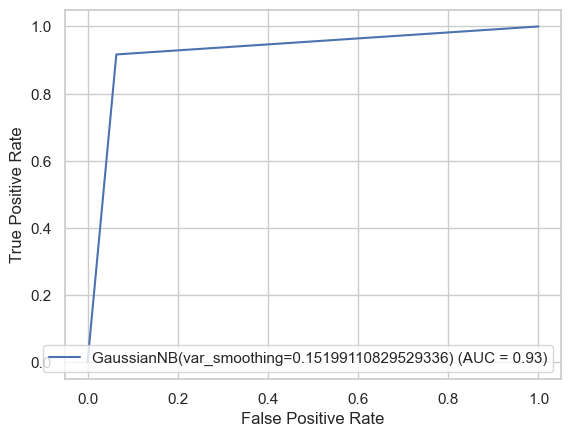

In [85]:
fpr, tpr, thresolds = roc_curve(y_test, pred_values)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()
plt.show()

In [86]:
# Saving the model 
joblib.dump(final_model, "Glass_Identification_Project.pkl")

['Glass_Identification_Project.pkl']

In [87]:
# Loading the saved model
model = joblib.load("Glass_Identification_Project.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [88]:
# Compairing actual and predicted values
actual_values = np.array(y_test)
df = pd.DataFrame()
df['Actual Values'] = actual_values
df['Predicted Values'] = predicted_values
df

Actual Values  Predicted Values
0               1                 1
1               0                 0
2               1                 1
3               0                 0
4               0                 0
5               0                 0
6               0                 0
7               0                 0
8               0                 0
9               0                 0
10              0                 0
11              0                 0
12              1                 1
13              0                 0
14              0                 0
15              0                 0
16              1                 1
17              1                 1
18              0                 0
19              0                 0
20              0                 0
21              1                 1
22              0                 0
23              0                 1
24              0                 0
25              1                 1
26              0                 0
27              0                 0
28              0                 0
29              0                 0
30              0                 0
31              0                 0
32              0                 0
33              0                 0
34              1                 1
35              0                 0
36              0                 0
37              0                 0
38              0                 0
39              0                 0
40              0                 0
41              1                 1
42              0                 0
43              0                 1
44              0                 0
45              0                 0
46              0                 0
47              0                 1
48              0                 0
49              0                 0
50              0                 0
51              1                 0
52              0                 0
53              1                 1
54              0                 0
55              0                 0
56              1                 1
57              0                 0
58              0                 0

In [89]:
# Testing the model
glass_details = pd.DataFrame({
    'RI': [1.51761],       
    'Na': [13.53],         
    'Al': [1.29],        
    'Si': [72.99],        
    'K' : [0.57],      
    'Ca': [7.78],
    'Ba': [0.0],
    'Fe': [0.0]
})

# Use the trained model to predict glass type
prediction = final_model.predict(glass_details)

if prediction[0] == 0:
    print("The model predicts that the class type is window glass")
else:
    print("The model predicts that the class type is non-window glass ")

The model predicts that the class type is non-window glass 
